<h1>Exploratory data analysis of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico</h1>
<h3>Viktoriia Ilina</h3>
<h3>October 2021</h3>

<h2>Overview</h2>

It’s estimated that 8% of deaths were the consequence of obesity worldwide in 2017, which almost doubles the numbers of 1990. Whereas across many middle-income countries – particularly across Eastern Europe, Central Asia, North Africa, and Latin America – the situation is even more dramatic  - over 15% of deaths[9].  Furthermore, according to OECD health policy study “The Heavy Burden of obesity: The Economics of Prevention”,  the overweight-related diseases will reduce life expectancy in Mexico by more than 4 years over the next 30 years[2]. This renders an obesity is one of the most crucial public health problems facing the world nowadays. The problem is further exacerbated by protracted situation with COVID-19.

The following analysis validates the impact of different factors that propitiate the apparition of obesity problems.  The data was extracted from the UCI Machine Learning Repository, a tremendous resource for empirical and methodological research in machine learning for decades[12], and scopes eating habits and physical condition of two thousand one hundred eleven inhabitants of Mexico, Peru and Colombia with ages between 14 and 61. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform[11].

<h2>The exploratory analysis of data</h2>

Before we get started, we should install and import all necessary libraries and load the data. The .csv file from the UCI Machine Learning Repository has been uploaded to the author’s GitHub account. 


In [1]:
!pip install pandas
import pandas as pd
!pip install plotly
!pip install cufflinks
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing = 'public', theme = 'white', offline = True)
!pip install pingouin --upgrade --ignore-installed scipy
from pingouin import kruskal
!pip install scikit-posthocs
import scikit_posthocs as sp

filepath = 'https://github.com/Viktoriia-Ilina/Obesity-problem/blob/main/Obesity.csv?raw=true'
data = pd.read_csv(filepath)
data.head()

     |████████████████████████████████| 81 kB 12.2 MB/s eta 0:00:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67917 sha256=d08c16a364d7cadf245c705474f0a565b13bf55a2b37824a31db22c03f3a09be
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


     |████████████████████████████████| 206 kB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 46.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 75.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 44.7 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 75.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 23.1 MB 74.4 MB/s eta 0:00:01
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
     |████████████████████████████████| 3.0 MB 41.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 56.0 MB/s eta 0:00:01
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
     |████████████████████████████████| 503 kB 66.0 MB/s eta 0:00:01

,Gender,Age,Height,Weight,Family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Most of the column names in the dataset  are presented in the form of uncommon abbreviations. So, it makes sense to rename columns using the description of the attributes[7]. 

The detail explanation of the variables:

- Gender: female or male;
- Age: numeric value;
- Height: numeric value in meters;
- Weight: numeric value in kilograms;
- Family history with overweight: yes or no;
- Frequent consumption of high caloric food (FAVC): yes or no; 
- Frequency of consumption of vegetables (FCVC): 1 = never, 2 = sometimes, 3 = always;
- Number of main meals (NCP):  1 = one, 2 = two, 3 = three, 4 = more than three;  
- Consumption of food between meals (CAEC): 1 = no, 2 = sometimes, 3 = frequently, 4 = always;
- Smoking(SMOKE): yes or no; 
- Consumption of water daily (CH20): 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters;
- Calories consumption monitoring (SCC): yes or no;
- Physical activity frequency (FAF): 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days;
- Time using technology devices (TUE): 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours;
- Consumption of alcohol (CALC): 1 = never, 2 = sometimes, 3 = frequently, 4 = always;
- Transportation used (MTRANS): automobile, motorbike, bike, public transportation, or walking;
- Weight category(NObesity): Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, or Obesity Type III.


In [19]:
data = data.rename(columns = {'FAVC': 'Consumption_of_high_caloric_food', 'FCVC': 'Frequency_of_consumption_of_vegetables', 'NCP': 'Number_of_main_meals', 'CAEC': 'Consumption_of_food_between_meals', 
                            'SMOKE': 'Smoking', 'CH2O': 'Consumption_of_water_daily', 'SCC': 'Calories_consumption_monitoring', 'FAF': 'Physical_activity_frequency', 'TUE': 'Time_using_technology_devices', 
                            'CALC': 'Consumption_of_alcohol', 'MTRANS': 'Transportation_used', 'NObesity': 'Weight_category'})
list(data.columns)

['Gender',
 'Age',
 'Height',
 'Weight',
 'Family_history_with_overweight',
 'Consumption_of_high_caloric_food',
 'Frequency_of_consumption_of_vegetables',
 'Number_of_main_meals',
 'Consumption_of_food_between_meals',
 'Smoking',
 'Consumption_of_water_daily',
 'Calories_consumption_monitoring',
 'Physical_activity_frequency',
 'Time_using_technology_devices',
 'Consumption_of_alcohol',
 'Transportation_used',
 'Weight_category']

The obesity levels were defined based on Body Mass Index Classification by WHO and the Mexican Normativity[7]: 

- Underweight: less than 18.5;
- Normal: 18.5 to 24.9;
- Overweight: 25.0 to 29.9;
- Obesity I: 30.0 to 34.9;
- Obesity II: 35.0 to 39.9;
- Obesity III Higher than 40.

For further analysis, we restore BMI initial data calculating it from height and weight columns. Body Mass Index is determined as a person's weight in kilograms divided by the square of his height in meters (kg/m²)[5]. The mean BMI is 30.1 kg/m² for males and 29.3 kg/m² for females.

Then we drop height and weight data, since it's totally related with the target variable.

In [20]:
data['BMI'] = data['Weight']/(data['Height']**2)
data['BMI'] = data['BMI'].apply(lambda x: f"{x:.1f}").astype('float')

data[['BMI', 'Gender']].groupby('Gender').describe()

BMI                                                      
         count       mean       std   min    25%   50%     75%   max
Gender                                                              
Female  1043.0  30.128763  9.399079  13.0  22.35  28.5  40.100  50.8
Male    1068.0  29.281835  6.347297  13.3  25.60  28.9  35.225  49.5

In [21]:
data = data.drop(['Height', 'Weight'], axis=1)

data

,Gender,Age,Family_history_with_overweight,Consumption_of_high_caloric_food,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoking,Consumption_of_water_daily,Calories_consumption_monitoring,Physical_activity_frequency,Time_using_technology_devices,Consumption_of_alcohol,Transportation_used,Weight_category,BMI
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.9
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.9
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.7
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.5
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.1


In the initial data via survey the categories of obesity levels were unbalanced, so the authors synthasize records using Waikato Environment for Knowledge Analysis and Synthetic Minority Oversampling Technique to simulate additional responses. As a result, the synthasized data fits the distribution of the data but generates floats into columns which originally contain integer data. So, we convert synthetic floats to integers to better represent the ordinal data from original survey data.

In [22]:
cols = ['Age', 'Frequency_of_consumption_of_vegetables', 'Number_of_main_meals', 'Consumption_of_water_daily', 'Physical_activity_frequency', 'Time_using_technology_devices']

data[cols] = data[cols].round(0).astype(int)

data

,Gender,Age,Family_history_with_overweight,Consumption_of_high_caloric_food,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoking,Consumption_of_water_daily,Calories_consumption_monitoring,Physical_activity_frequency,Time_using_technology_devices,Consumption_of_alcohol,Transportation_used,Weight_category,BMI
0,Female,21,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,24.4
1,Female,21,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,26.9
4,Male,22,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III,44.9
2107,Female,22,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III,43.7
2108,Female,23,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III,43.5
2109,Female,24,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III,44.1


There are no missing values, but categorical data is presented in the "object" type. Therefore, we need to convert categorical variables into the right format.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  2111 non-null   object 
 1   Age                                     2111 non-null   int64  
 2   Family_history_with_overweight          2111 non-null   object 
 3   Consumption_of_high_caloric_food        2111 non-null   object 
 4   Frequency_of_consumption_of_vegetables  2111 non-null   int64  
 5   Number_of_main_meals                    2111 non-null   int64  
 6   Consumption_of_food_between_meals       2111 non-null   object 
 7   Smoking                                 2111 non-null   object 
 8   Consumption_of_water_daily              2111 non-null   int64  
 9   Calories_consumption_monitoring         2111 non-null   object 
 10  Physical_activity_frequency             2111 non-null   int6

In [24]:
columns = ['Gender', 'Family_history_with_overweight', 'Consumption_of_high_caloric_food', 'Frequency_of_consumption_of_vegetables', 'Number_of_main_meals', 'Consumption_of_food_between_meals',  
           'Smoking', 'Consumption_of_water_daily', 'Calories_consumption_monitoring', 'Physical_activity_frequency', 'Time_using_technology_devices', 'Consumption_of_alcohol', 'Transportation_used', 
           'Weight_category'] 

data[columns] = data[columns].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Gender                                  2111 non-null   category
 1   Age                                     2111 non-null   int64   
 2   Family_history_with_overweight          2111 non-null   category
 3   Consumption_of_high_caloric_food        2111 non-null   category
 4   Frequency_of_consumption_of_vegetables  2111 non-null   category
 5   Number_of_main_meals                    2111 non-null   category
 6   Consumption_of_food_between_meals       2111 non-null   category
 7   Smoking                                 2111 non-null   category
 8   Consumption_of_water_daily              2111 non-null   category
 9   Calories_consumption_monitoring         2111 non-null   category
 10  Physical_activity_frequency             2111 non

For ease of presentation, we replace "integer" labels to real answers from survey. 

In [25]:
label1 = {1:'Never', 2:'Sometimes', 3:'Always'}
label2 = {1:'One', 2:'Two', 3:'Three', 4:'More than 3'}
label3 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
label4 = {0: 'None', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
label5 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

data['Frequency_of_consumption_of_vegetables'] = data['Frequency_of_consumption_of_vegetables'].replace(label1)
data['Number_of_main_meals'] = data['Number_of_main_meals'].replace(label2)
data['Consumption_of_water_daily'] = data['Consumption_of_water_daily'].replace(label3)
data['Physical_activity_frequency'] = data['Physical_activity_frequency'].replace(label4)
data['Time_using_technology_devices'] = data['Time_using_technology_devices'].replace(label5)

data

,Gender,Age,Family_history_with_overweight,Consumption_of_high_caloric_food,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoking,Consumption_of_water_daily,Calories_consumption_monitoring,Physical_activity_frequency,Time_using_technology_devices,Consumption_of_alcohol,Transportation_used,Weight_category,BMI
0,Female,21,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,None,3–5 hours,no,Public_Transportation,Normal_Weight,24.4
1,Female,21,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight_Level_I,26.9
4,Male,22,no,no,Sometimes,One,Sometimes,no,Between 1 and 2 L,no,None,0–2 hours,Sometimes,Public_Transportation,Overweight_Level_II,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Sometimes,Public_Transportation,Obesity_Type_III,44.9
2107,Female,22,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public_Transportation,Obesity_Type_III,43.7
2108,Female,23,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public_Transportation,Obesity_Type_III,43.5
2109,Female,24,yes,yes,Always,Three,Sometimes,no,More than 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public_Transportation,Obesity_Type_III,44.1


We can observed a pretty balanced distribution of data regarding the obesity levels category, owing to using the Weka tool and the SMOTE filter. The datapoints are more skewed towards respondents who fall into the three obese categories, as they make up the top three categories by the number of respondents. Whereas, if we turn to the country statistical profiles, we see that a number of people with overweight is significantly higher than obesity cases. For instance, Peruvian National Institute of Health reported that 40% of people in Peru are overweight, about 20% of these are obese[10]. Besides, only 0.8% male and 1.4% female in Mexico are underweight[13], though people with insufficient weight are more than 10% in the dataset. Therefore, we should keep in mind this information while making conclusions.


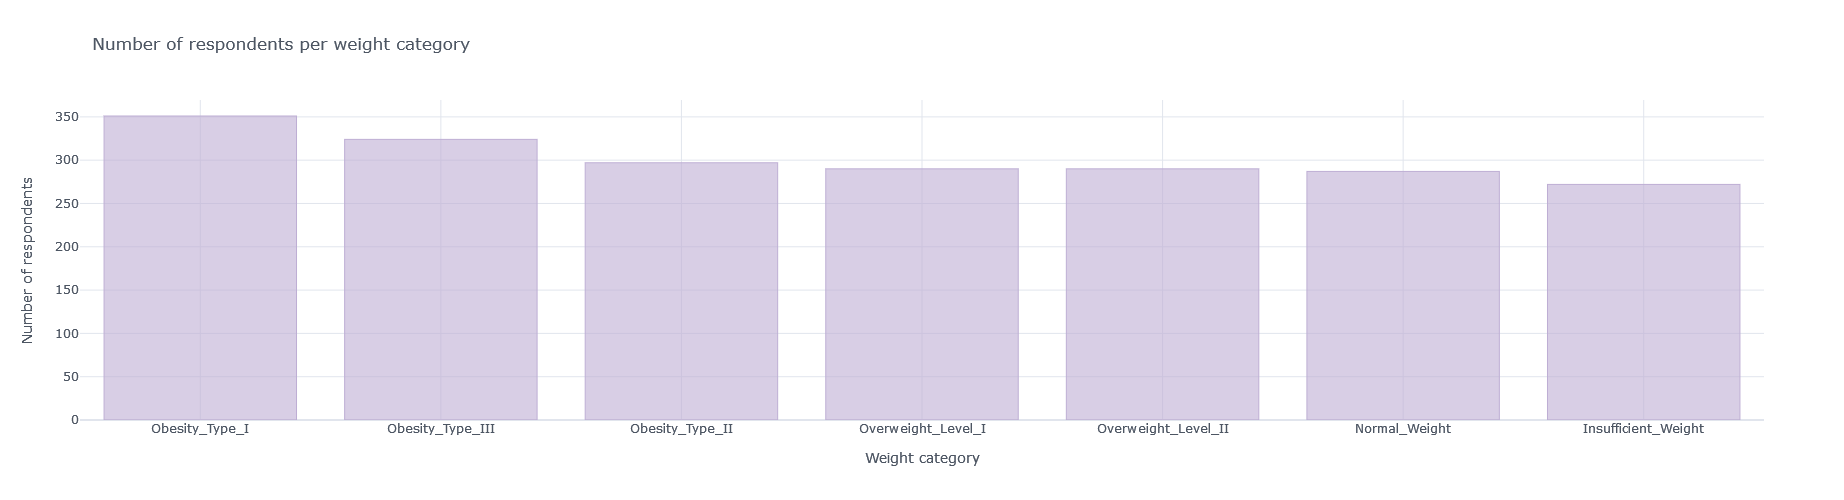

In [26]:
respondents_per_obesity = data['Weight_category'].value_counts()
respondents_per_obesity.iplot(kind = 'bar', dimensions = (800,500), 
                             xTitle = 'Weight category', yTitle = 'Number of respondents', 
                             title = 'Number of respondents per weight category', color = '#BEAED4')

The number of men and women in the sample is approximately the same. There is no relationship between gender and Body Mass Index, since females and males have the same median BMI; nevertheless, BMI of females is more spread out. 

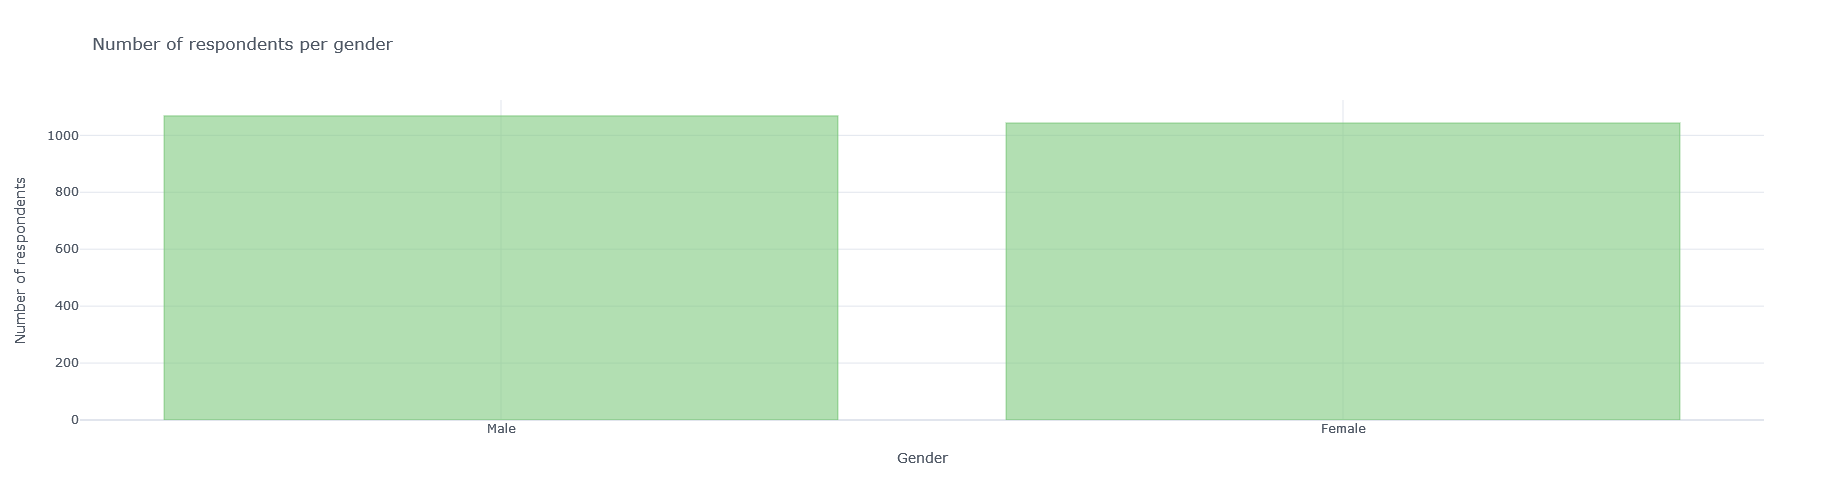

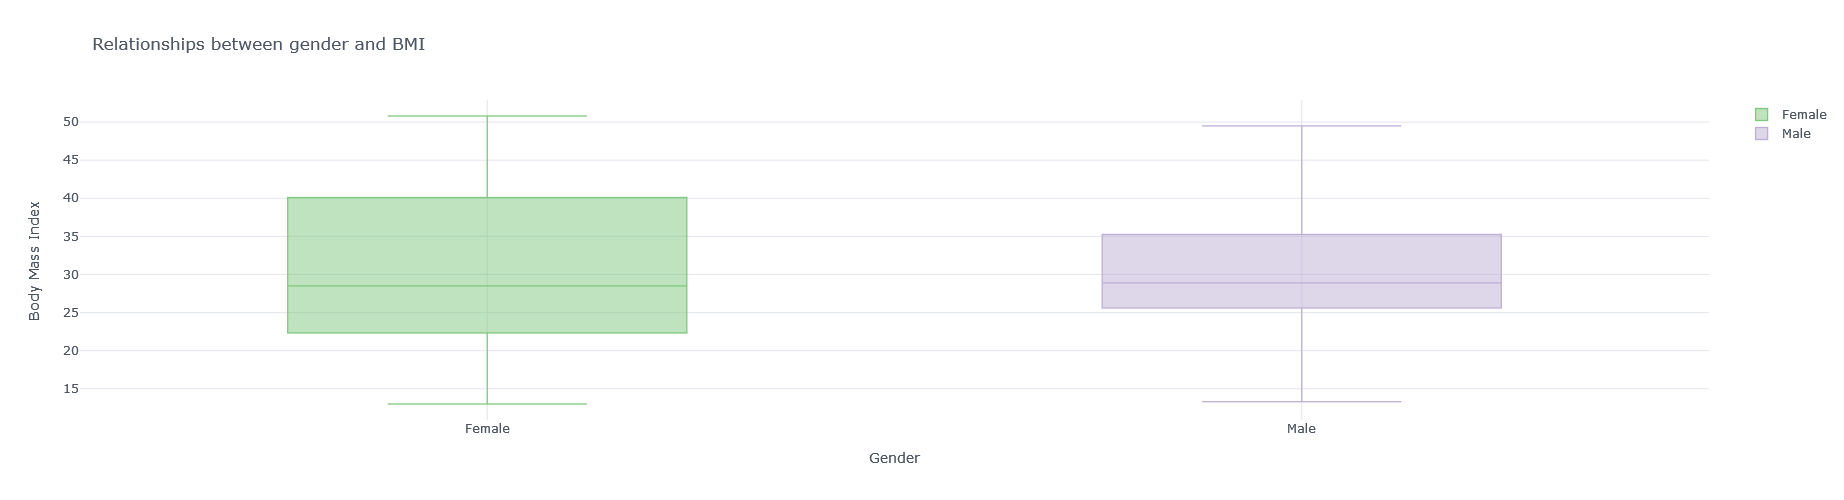

In [27]:
respondents_per_gender = data['Gender'].value_counts()
respondents_per_gender.iplot(kind = 'bar', dimensions = (800,500), 
                             xTitle = 'Gender', yTitle = 'Number of respondents', 
                             title = 'Number of respondents per gender', color = '#7FC97F')

data[['Gender', 'BMI']].pivot(columns = 'Gender', values = 'BMI').iplot(kind = 'box', dimensions = (800,500),  
                                                                    xTitle = 'Gender', yTitle = 'Body Mass Index', 
                                                                    title = 'Relationships between gender and BMI', colorscale = 'Accent')

The age distribution of survey respondents is shown in the figure below. 75% of respondents are under 26 years, but some applicants are much older. The sample is missing some of ages.

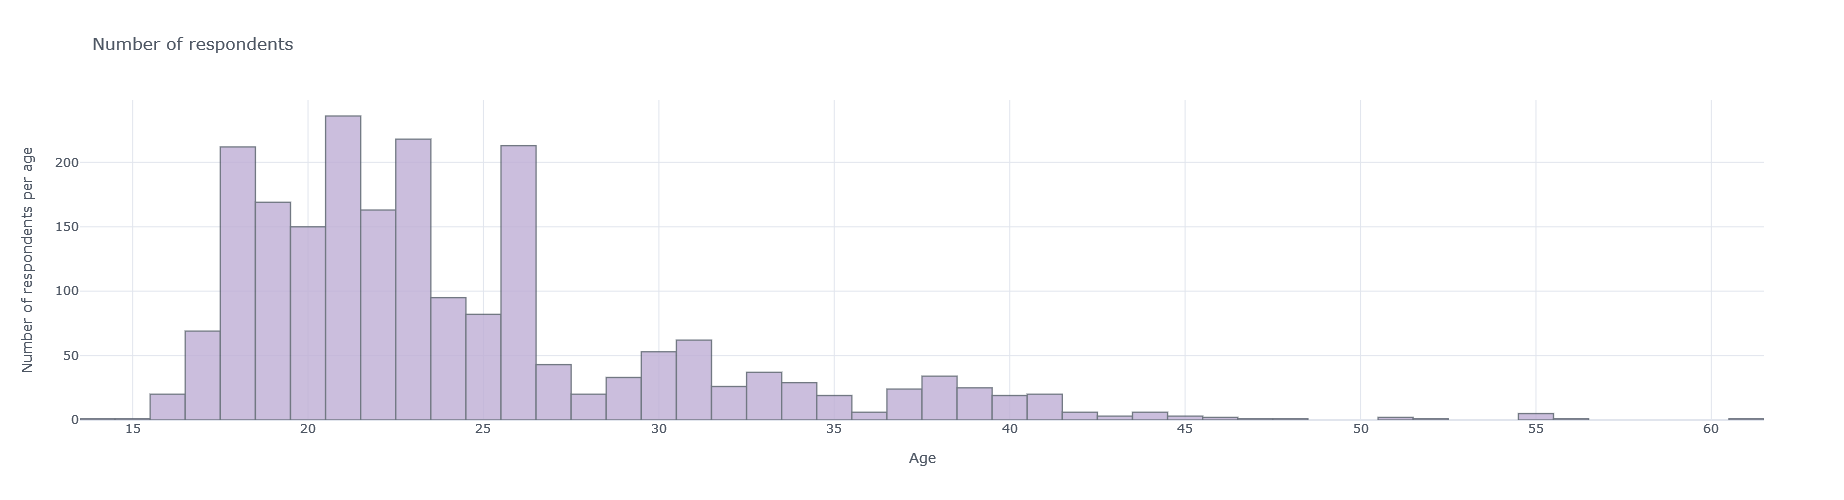

count    2111.000000
mean       24.315964
std         6.357078
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [28]:
data['Age'].iplot(kind = 'histogram', dimensions = (800,500), 
                  xTitle = 'Age', yTitle = 'Number of respondents per age',
                  title = 'Number of respondents', color = '#BEAED4')

data['Age'].describe()

Let's see the average Body Mass Index per age. The highest index is typical for twenty-six-years-old respondents and the lowest - for seventeen-years-old.

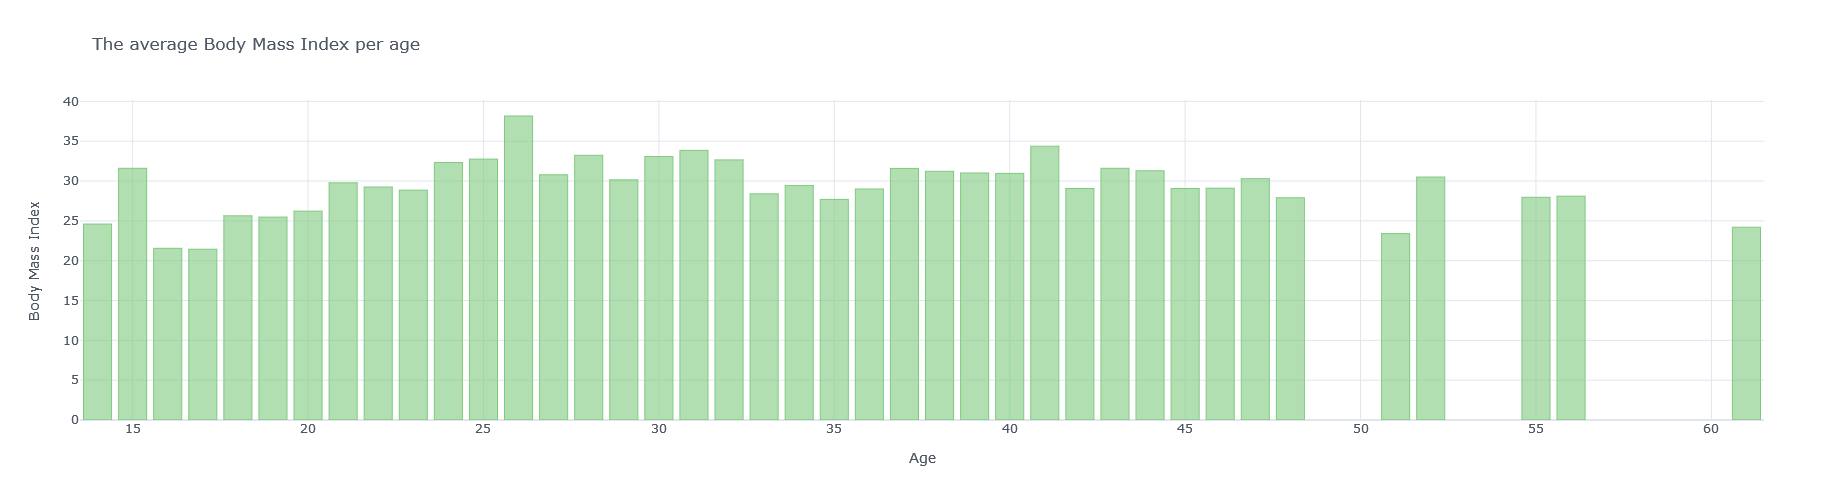

In [29]:
avg_bmi_per_age = data[['Age', 'BMI']].groupby(by = ['Age']).mean()
avg_bmi_per_age.iplot(kind = 'bar', y = 'BMI', dimensions = (800,500), 
                      xTitle = 'Age', yTitle = 'Body Mass Index', 
                      title = 'The average Body Mass Index per age', color = '#7FC97F')

82% of respondents have one or more family members suffered or suffer from overweight. The graph below shows a clear link between family history and BMI: the median BMI of those with a family history of overweight is about 11 kg/m² higher. However, no one should blames genes and think that overweight is predetermined. According to Sarah Earhart (registered Dietitian Nutritionist), family dynamics and home environment is thought to have an even larger affect  on weight than genetics[4].

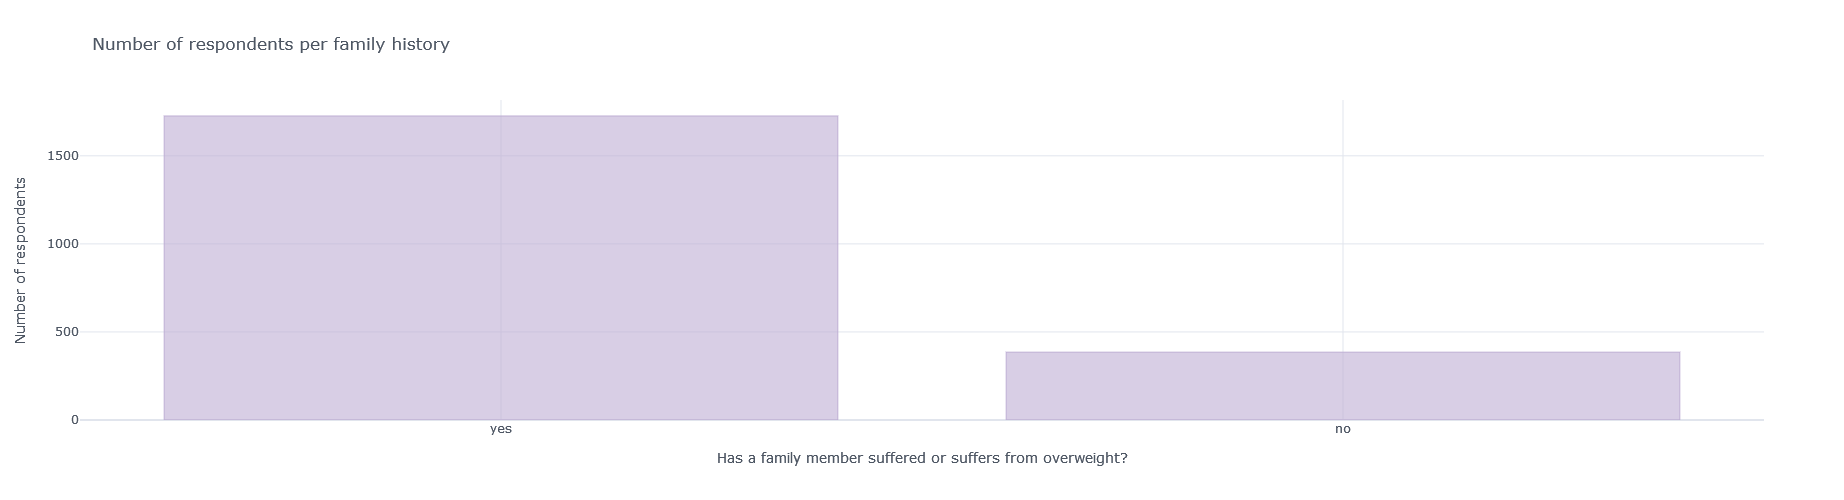

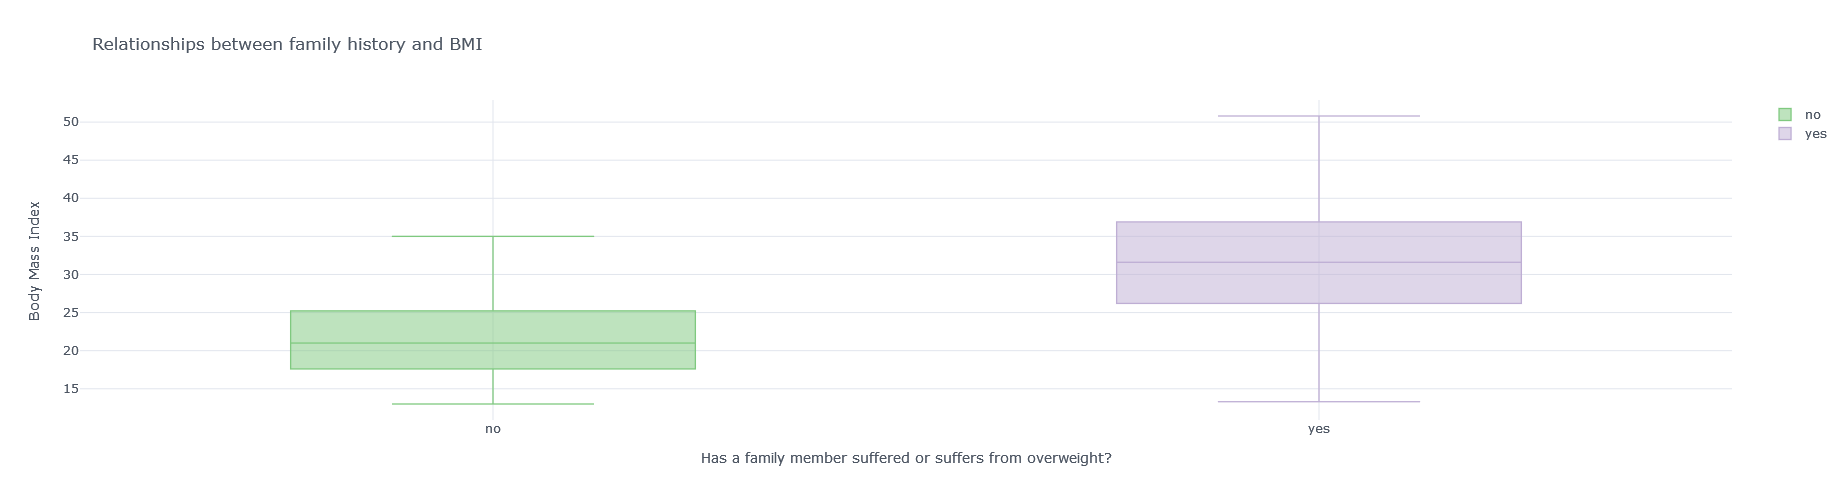

In [30]:
respondents_per_history = data['Family_history_with_overweight'].value_counts()
respondents_per_history.iplot(kind = 'bar', dimensions = (800,500), 
                              xTitle = 'Has a family member suffered or suffers from overweight?', yTitle = 'Number of respondents', 
                              title = 'Number of respondents per family history', color = '#BEAED4')

data[['Family_history_with_overweight', 'BMI']].pivot(columns = 'Family_history_with_overweight', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                                                    xTitle = 'Has a family member suffered or suffers from overweight?', yTitle = 'Body Mass Index', 
                                                                                                                    title = 'Relationships between family history and BMI', colorscale = 'Accent')

Most of the respondents (88.4%) eat high-calorie food frequently. There are 1,080 calories in a Big Mac® Combo Meal with a medium Coca-Cola® and medium fries[1], whereas the average energy allowance for men of reference size (77 kg) is 2,300 kcal/day; for women, it is 1,900 kcal/day[3]. As a result, it's very easy to get energy imbalance consuming energy-rich food. Indeed, participants who frequently consume high-calorie food have a median Body Mass Index approximately 6 kg/m² higher.

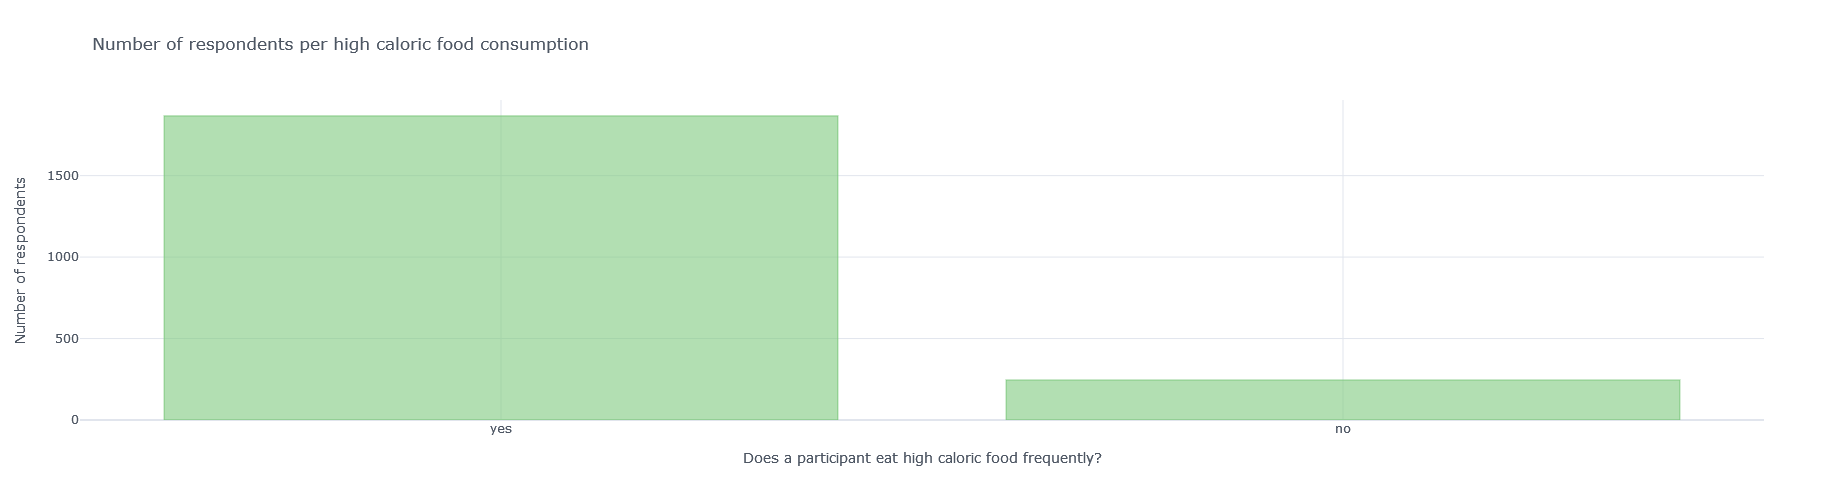

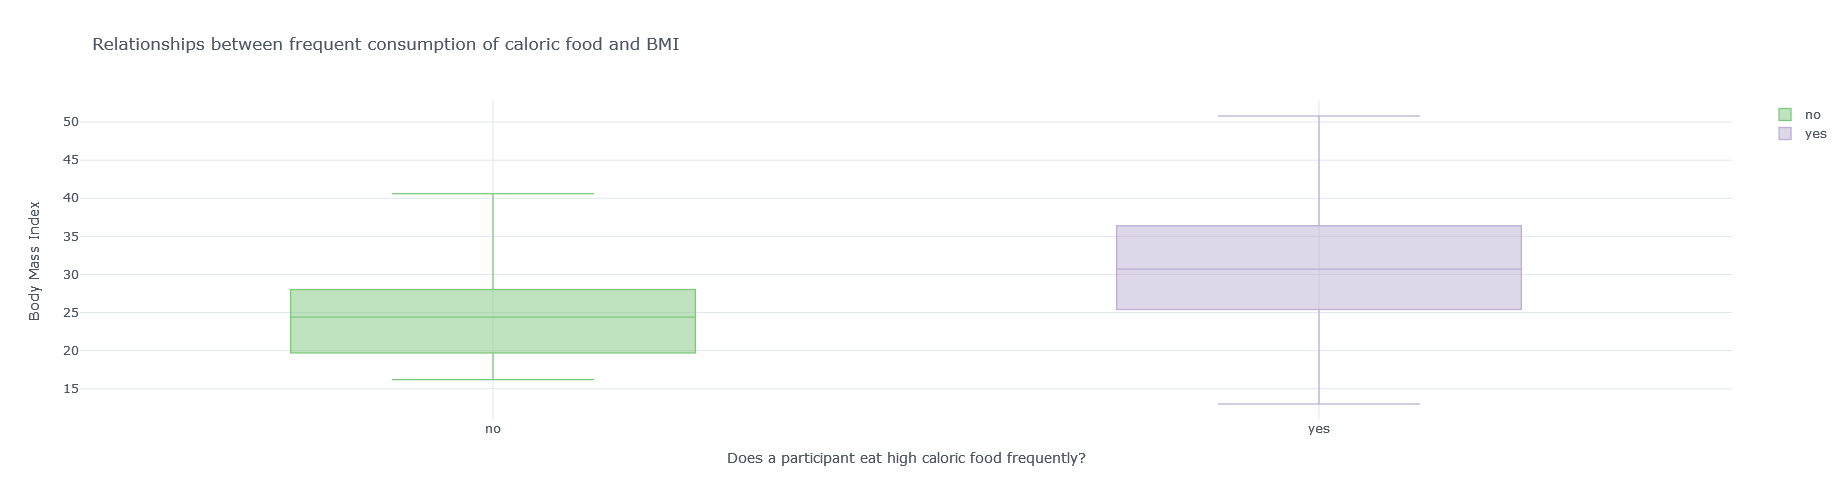

In [31]:
respondents_per_caloric_food = data['Consumption_of_high_caloric_food'].value_counts()
respondents_per_caloric_food.iplot(kind = 'bar', dimensions = (800,500),  
                                   xTitle = 'Does a participant eat high caloric food frequently?', yTitle = 'Number of respondents', 
                                   title = 'Number of respondents per high caloric food consumption', color = '#7FC97F')

data[['Consumption_of_high_caloric_food', 'BMI']].pivot(columns = 'Consumption_of_high_caloric_food', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                                                        xTitle = 'Does a participant eat high caloric food frequently?', yTitle = 'Body Mass Index', 
                                                                                                                        title = 'Relationships between frequent consumption of caloric food and BMI', 
                                                                                                                        colorscale = 'Accent')

People can create lower-calorie versions of some of their favorite dishes by substituting vegetables in place of higher-calorie ingredients. The water and fiber in vegetables can add volume to dishes, that makes it possible to eat the same amount of food with fewer calories. However, adding vegetables to usual diet simply increases amount of calories, which may lead to weight gain despite expectations. There is no clear relationships between vegetable consumption and BMI in this research: respondents who never eat vegetables and those sometimes eating have the same median BMI, while regular eaters have much higher Body Mass Index. 

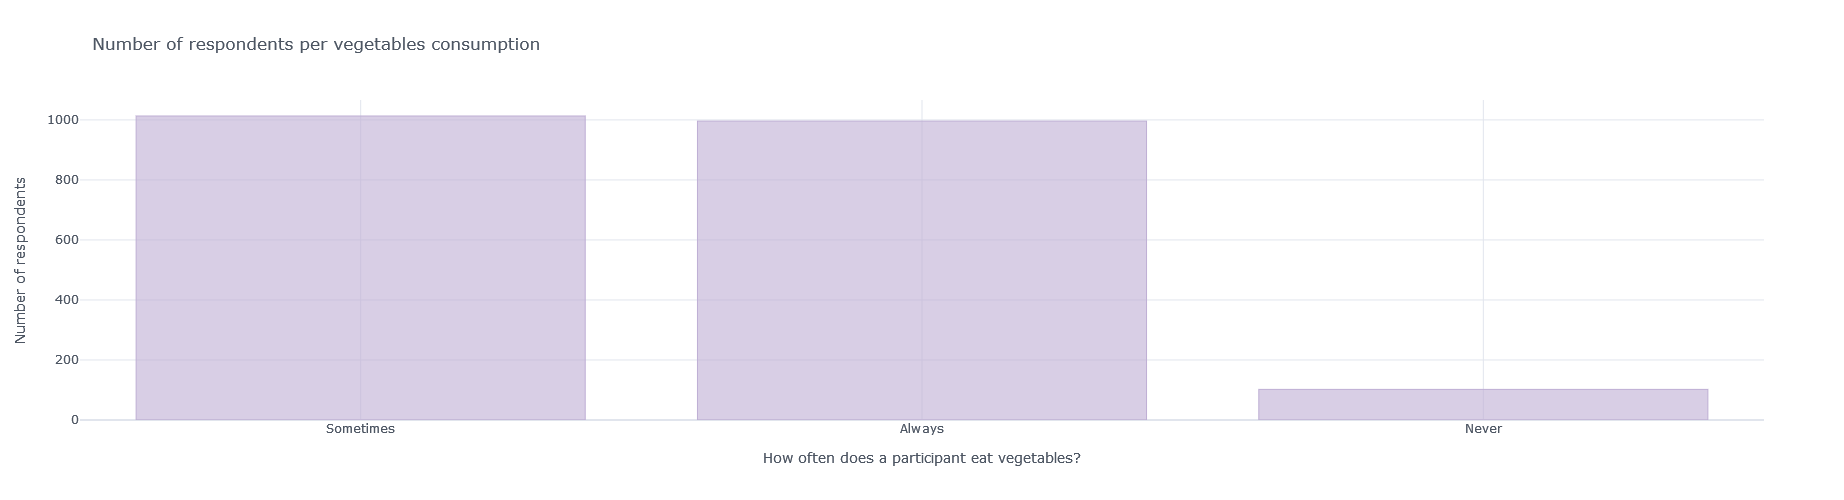

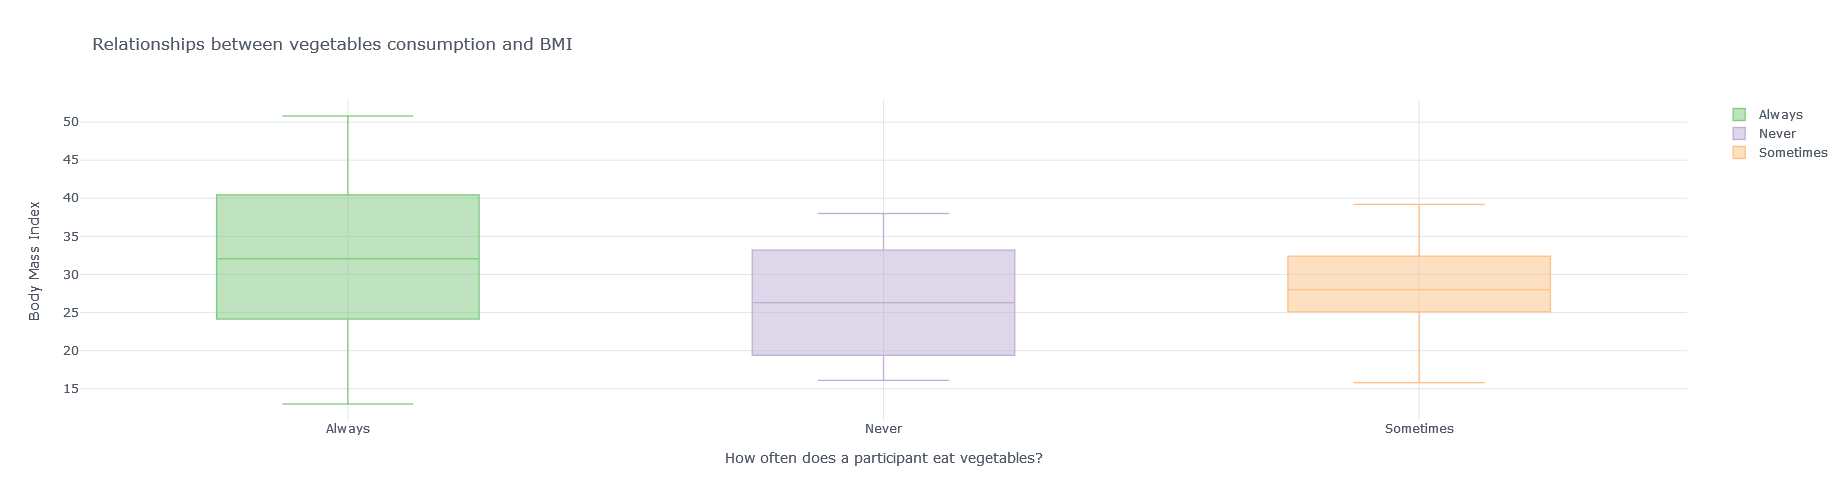

In [32]:
respondents_per_vegetables = data['Frequency_of_consumption_of_vegetables'].value_counts()
respondents_per_vegetables.iplot(kind = 'bar', dimensions = (800,500), 
                                 xTitle = 'How often does a participant eat vegetables?', yTitle = 'Number of respondents', 
                                 title = 'Number of respondents per vegetables consumption', color = '#BEAED4')

data[['Frequency_of_consumption_of_vegetables', 'BMI']].pivot(columns = 'Frequency_of_consumption_of_vegetables', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                                                                        xTitle = 'How often does a participant eat vegetables?', 
                                                                                                                                        yTitle = 'Body Mass Index', 
                                                                                                                                        title = 'Relationships between vegetables consumption and BMI', 
                                                                                                                                        colorscale = 'Accent')

The vast majority of participants indicated that they usually have three main meals per day and sometimes eat between repasts. The nature of the link between daily frequency of food consumption and Body Mass Index is relatively controversial.

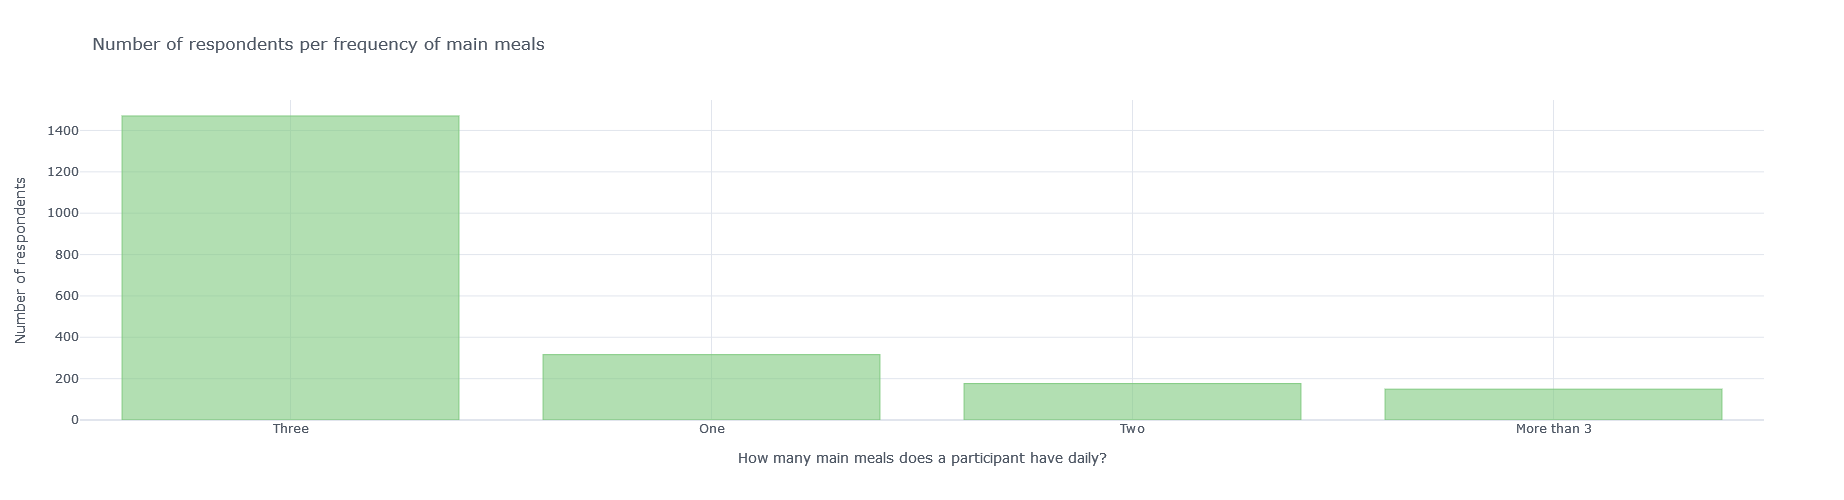

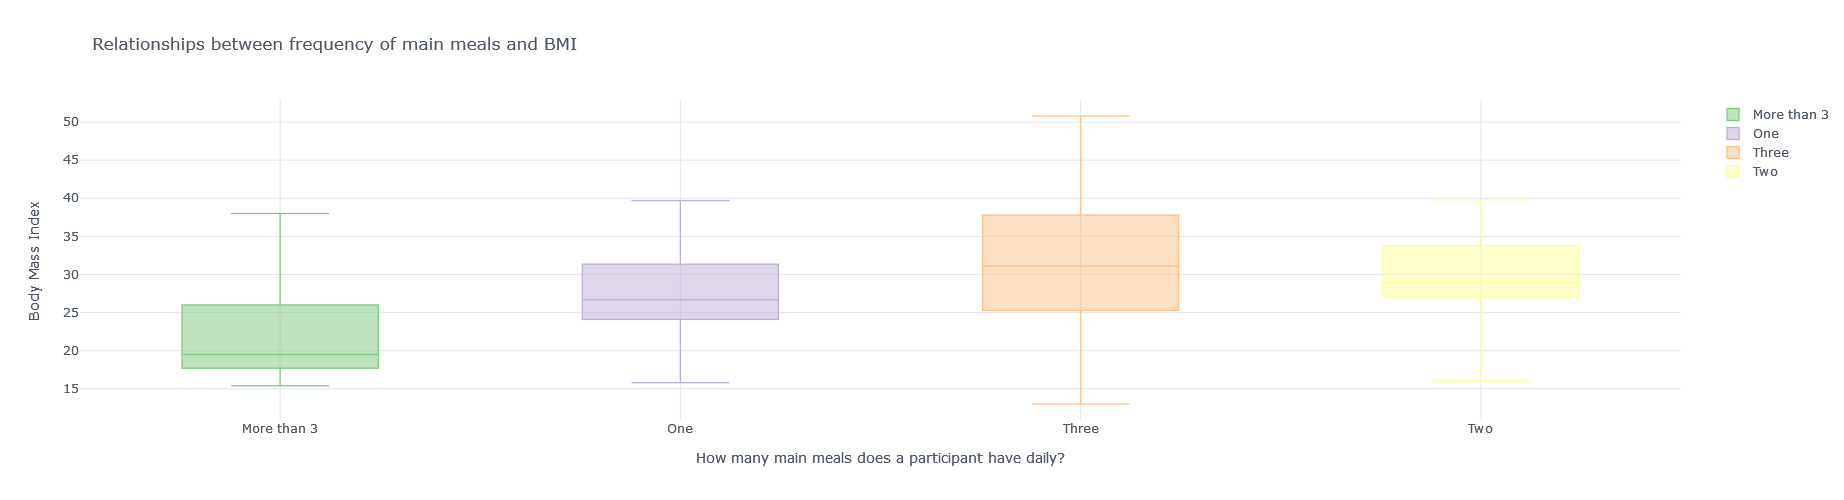

In [33]:
respondents_per_meals = data['Number_of_main_meals'].value_counts()
respondents_per_meals.iplot(kind = 'bar', dimensions = (800,500), 
                            xTitle = 'How many main meals does a participant have daily?', yTitle = 'Number of respondents', 
                            title = 'Number of respondents per frequency of main meals', color = '#7FC97F')

data[['Number_of_main_meals', 'BMI']].pivot(columns = 'Number_of_main_meals', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                                    xTitle = 'How many main meals does a participant have daily?', yTitle = 'Body Mass Index', 
                                                                                                    title = 'Relationships between frequency of main meals and BMI', colorscale = 'Accent')

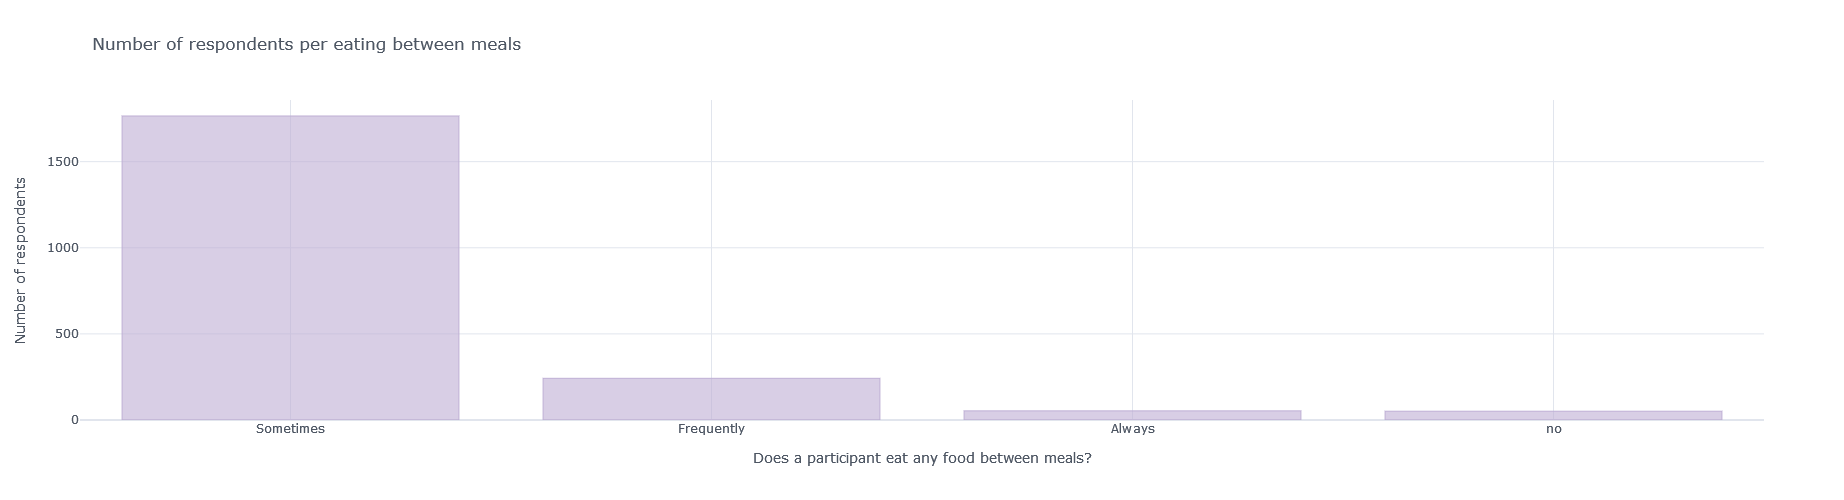

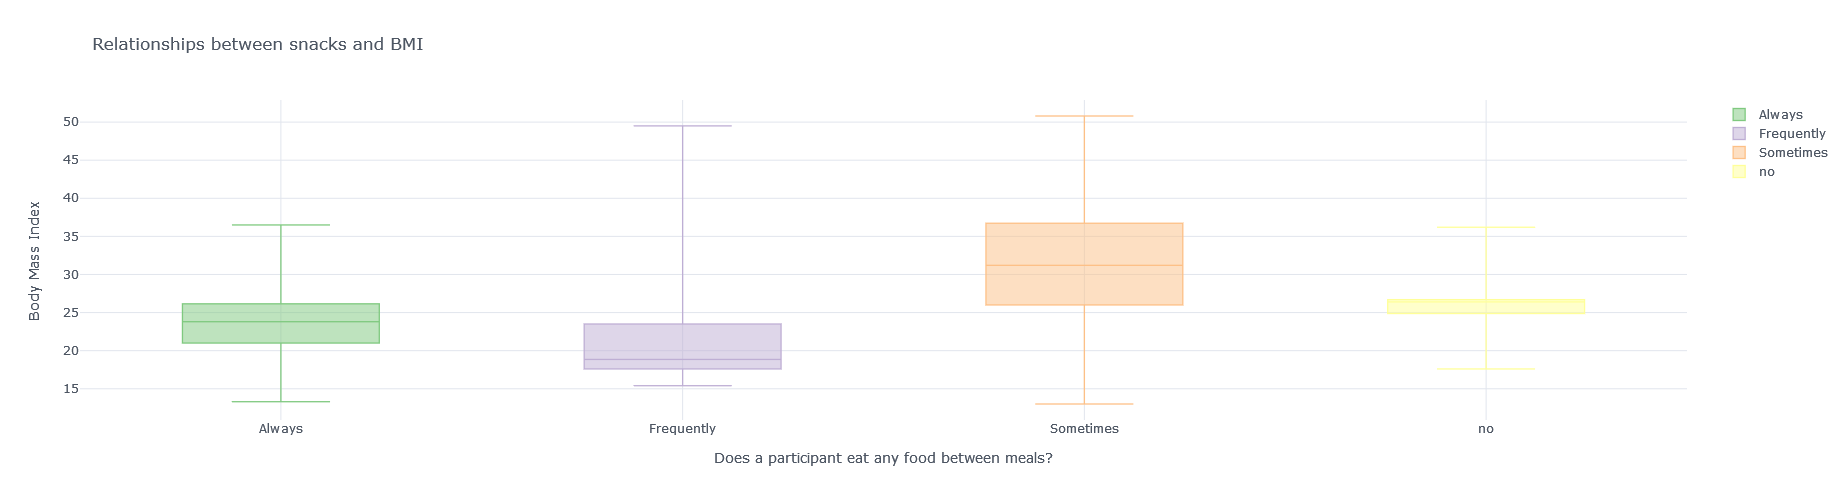

In [34]:
respondents_per_snack = data['Consumption_of_food_between_meals'].value_counts()
respondents_per_snack.iplot(kind = 'bar', dimensions = (800,500), 
                               xTitle = 'Does a participant eat any food between meals?', yTitle = 'Number of respondents', 
                               title = 'Number of respondents per eating between meals', color = '#BEAED4')

data[['Consumption_of_food_between_meals', 'BMI']].pivot(columns='Consumption_of_food_between_meals', values='BMI').iplot(kind='box', dimensions=(800,500), 
                                                                                                                          xTitle='Does a participant eat any food between meals?', yTitle='Body Mass Index', 
                                                                                                                          title='Relationships between snacks and BMI', colorscale = 'Accent')

We can observe a slightly positive trend between daily water consumption and Body Mass Index, though you shouldn't stop drinking to lose weight. Positive correlation could be explained by  natural higher water consumption cost by bigger body mass and volume. 

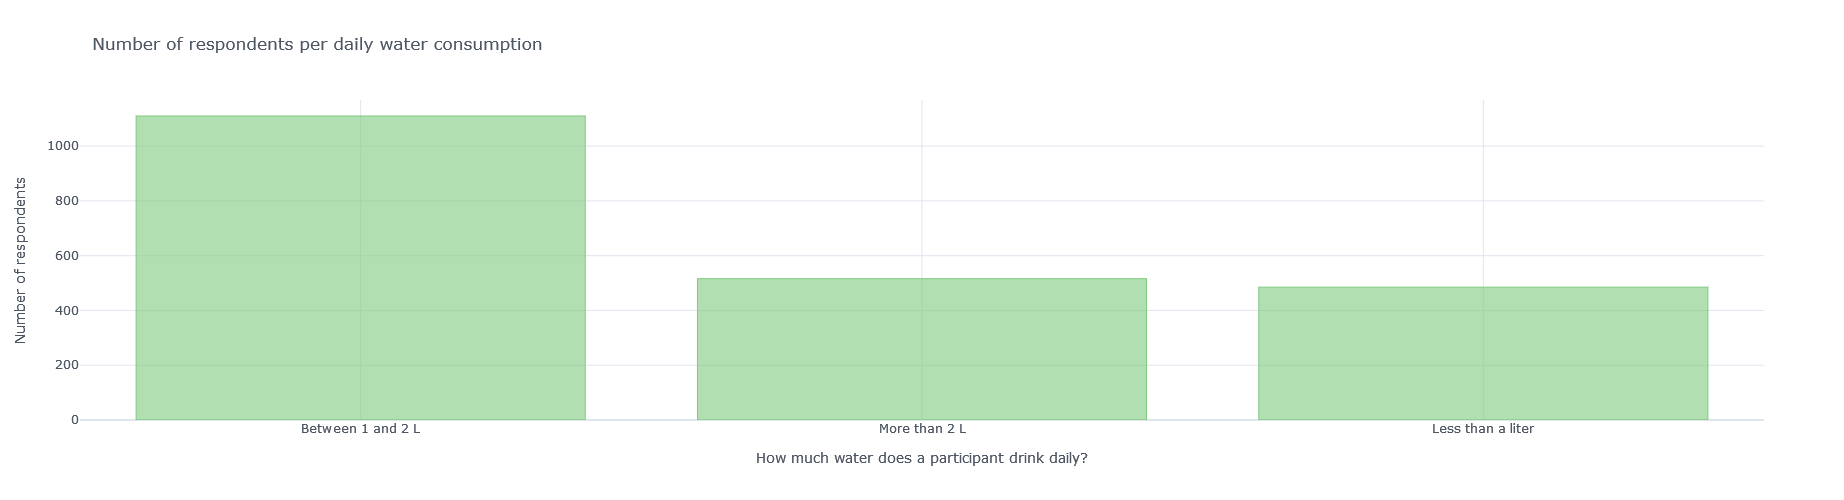

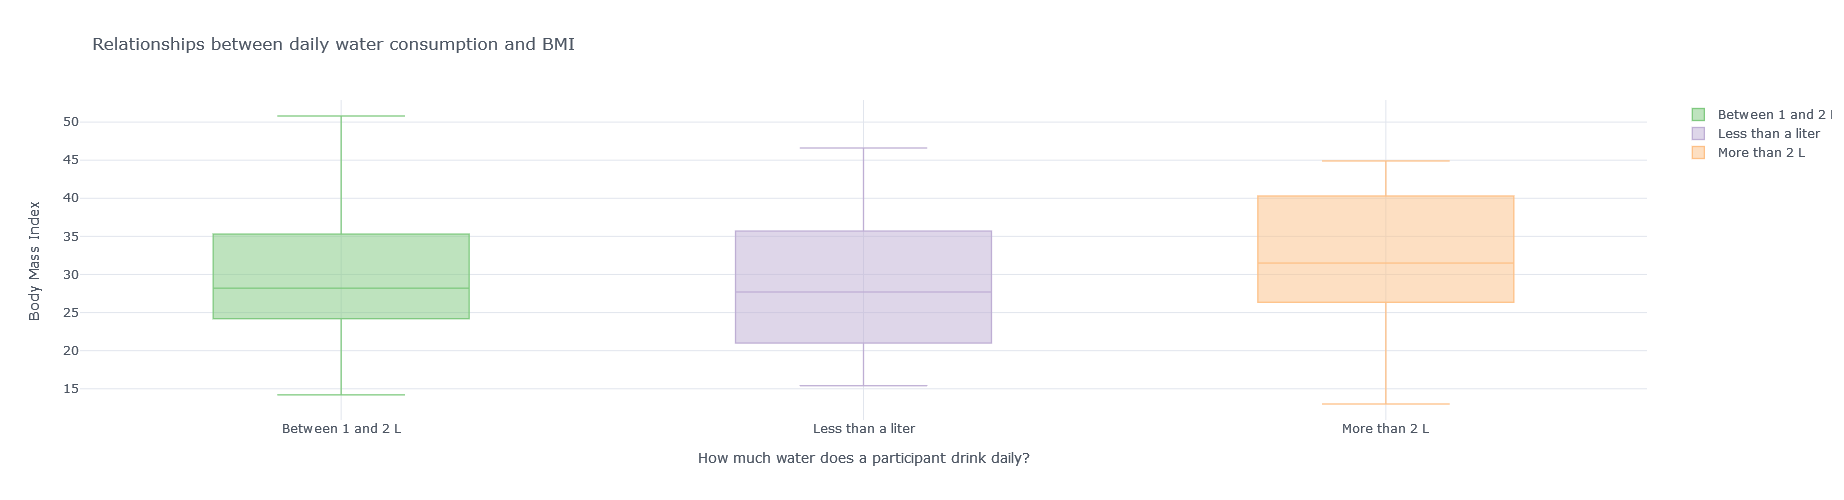

In [35]:
respondents_per_water = data['Consumption_of_water_daily'].value_counts()
respondents_per_water.iplot(kind = 'bar', dimensions = (800,500), 
                            xTitle = 'How much water does a participant drink daily?', yTitle = 'Number of respondents', 
                            title = 'Number of respondents per daily water consumption', color = '#7FC97F')

data[['Consumption_of_water_daily', 'BMI']].pivot(columns = 'Consumption_of_water_daily', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                                xTitle = 'How much water does a participant drink daily?', yTitle = 'Body Mass Index', 
                                                                                                title = 'Relationships between daily water consumption and BMI', colorscale = 'Accent')

There is a clear link between daily calories monitoring and Body Mass Index and it seems perfectly logical, however,  we should bear in mind that only 4.5% of respondents count the calories.

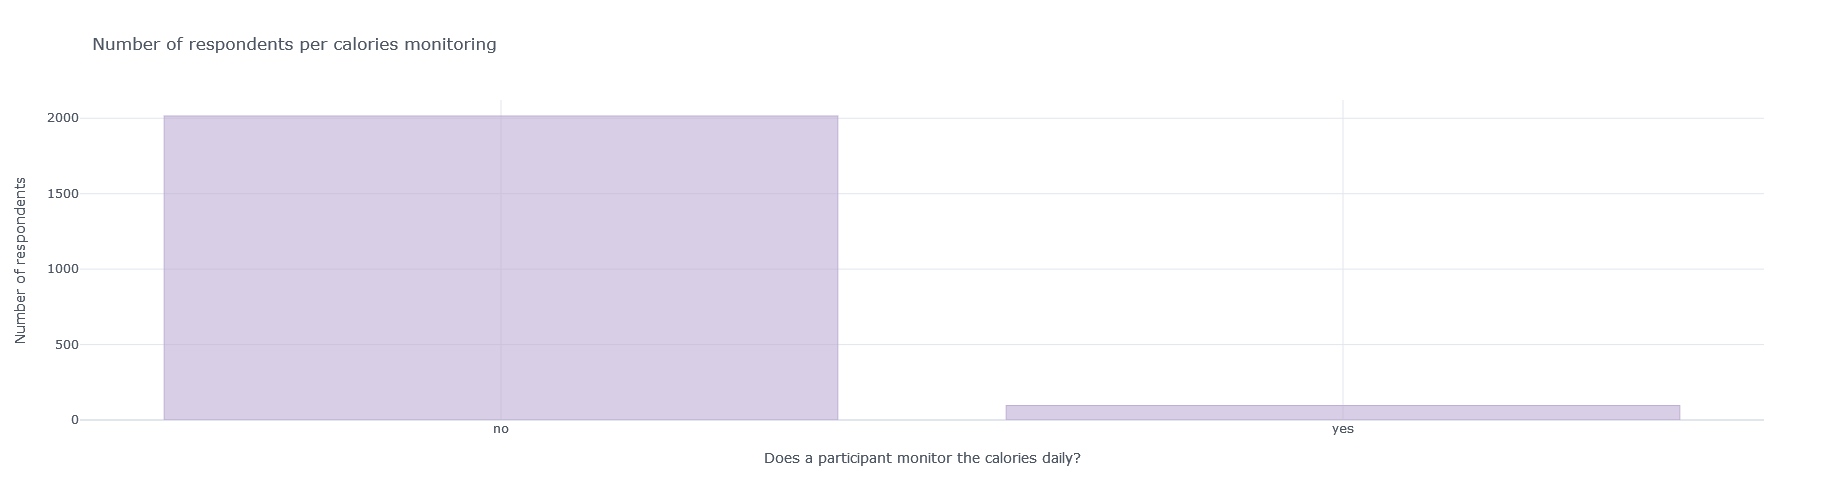

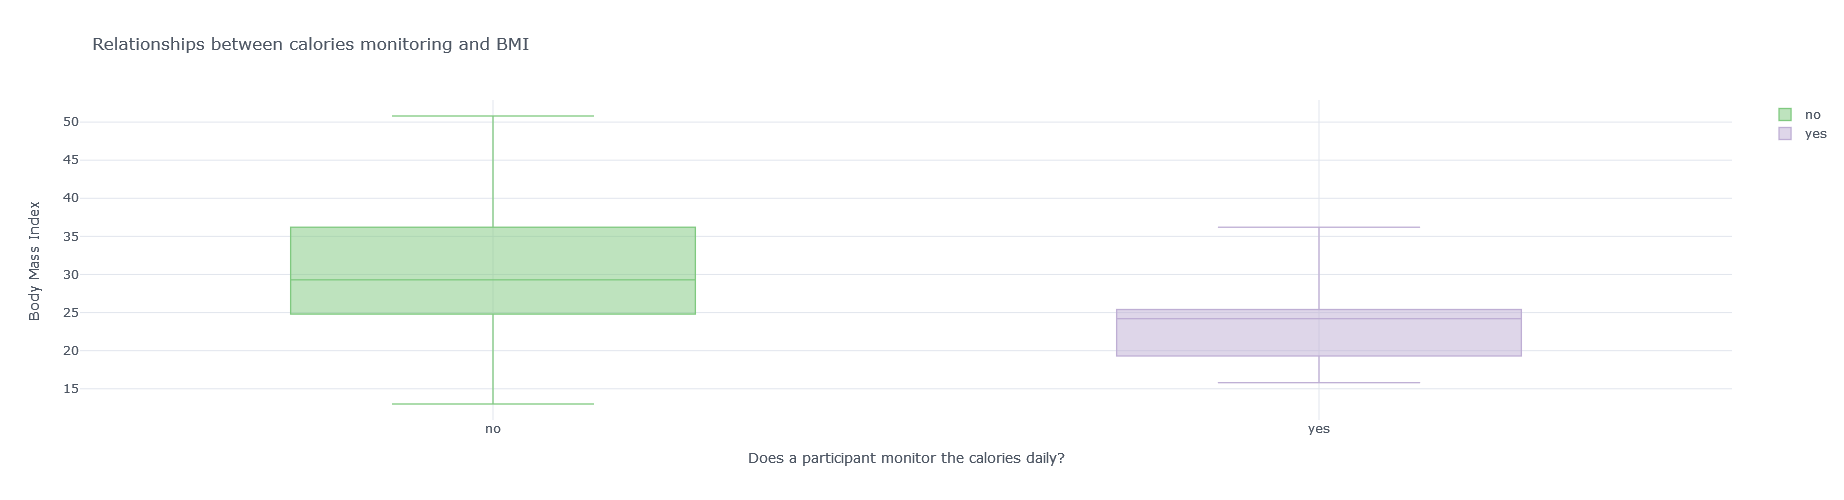

In [36]:
respondents_per_calories = data['Calories_consumption_monitoring'].value_counts()
respondents_per_calories.iplot(kind = 'bar', dimensions = (800,500), 
                               xTitle = 'Does a participant monitor the calories daily?', yTitle = 'Number of respondents', 
                               title = 'Number of respondents per calories monitoring', color = '#BEAED4')

data[['Calories_consumption_monitoring', 'BMI']].pivot(columns = 'Calories_consumption_monitoring', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                      xTitle = 'Does a participant monitor the calories daily?', yTitle = 'Body Mass Index', 
                                                                      title = 'Relationships between calories monitoring and BMI', colorscale = 'Accent')

There is a stereotype that smoking controls weight and that quitting leads to increases in body mass. However, we don't see significant difference in BMI between smoking and non-smoking respondents. This result could be explained by extremely small sample size of smokers (2%), which may drive it not be representative. 

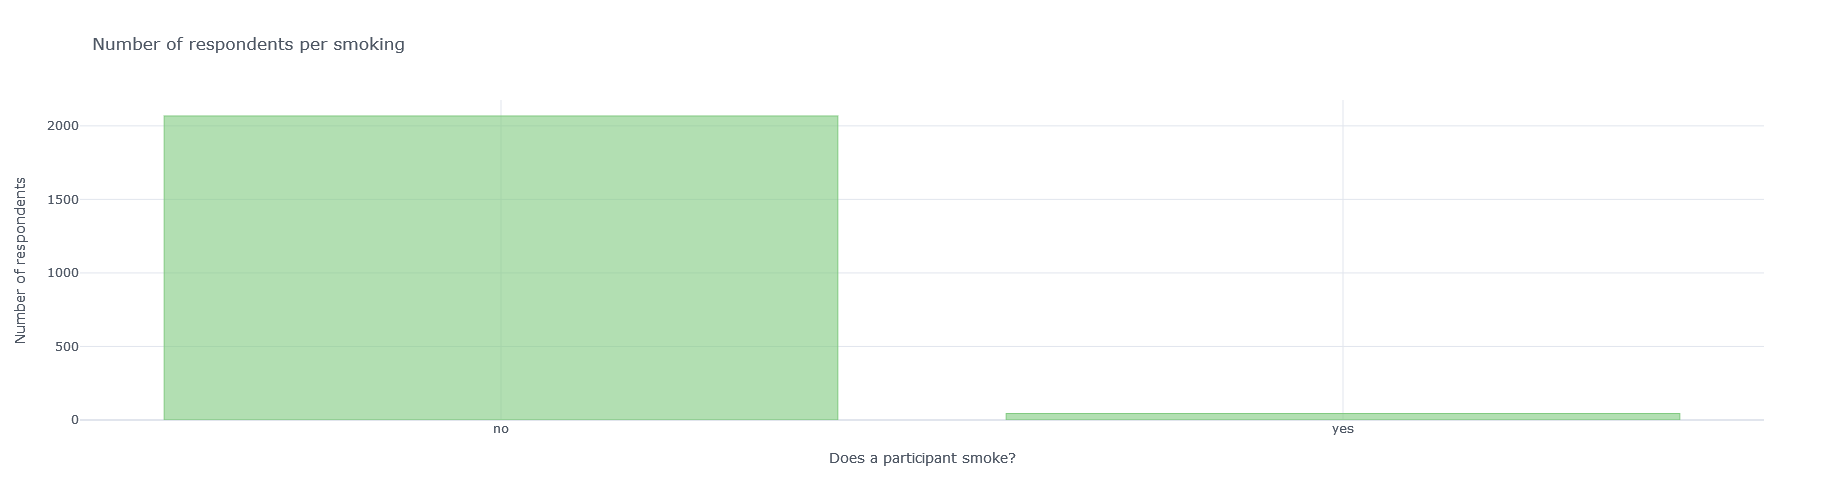

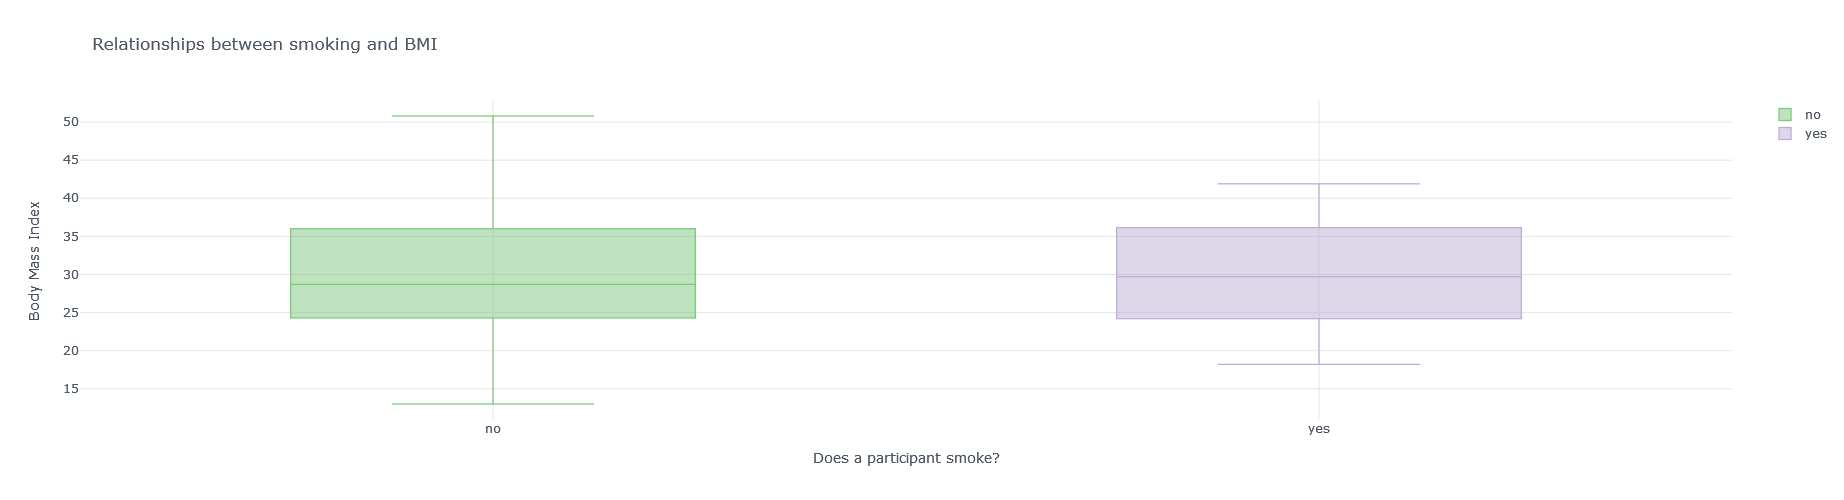

In [37]:
respondents_per_smoking = data['Smoking'].value_counts()
respondents_per_smoking.iplot(kind = 'bar', dimensions = (800,500), 
                              xTitle = 'Does a participant smoke?', yTitle = 'Number of respondents',  
                              title = 'Number of respondents per smoking', color = '#7FC97F')

data[['Smoking', 'BMI']].pivot(columns = 'Smoking', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                      xTitle = 'Does a participant smoke?', yTitle = 'Body Mass Index', 
                                                                      title = 'Relationships between smoking and BMI', colorscale = 'Accent')

There is no clear trend regarding alcohol consumption and Body Mass Index, as those who frequently drink alcohol had the same median BMI as those who do not drink alcohol at all. Besides, only one participant answered “always”, so this category might be not representative. 

Drinking alcohol increases appetite, and so can lead to overeating and weight gain, but people with alcoholism tend not to be affected by obesity, mainly because they are often malnourished, having replaced a portion of their food calories with calories from alcohol. Which again emphasizes the importance of an energy balance between calories consumed and calories expended. 

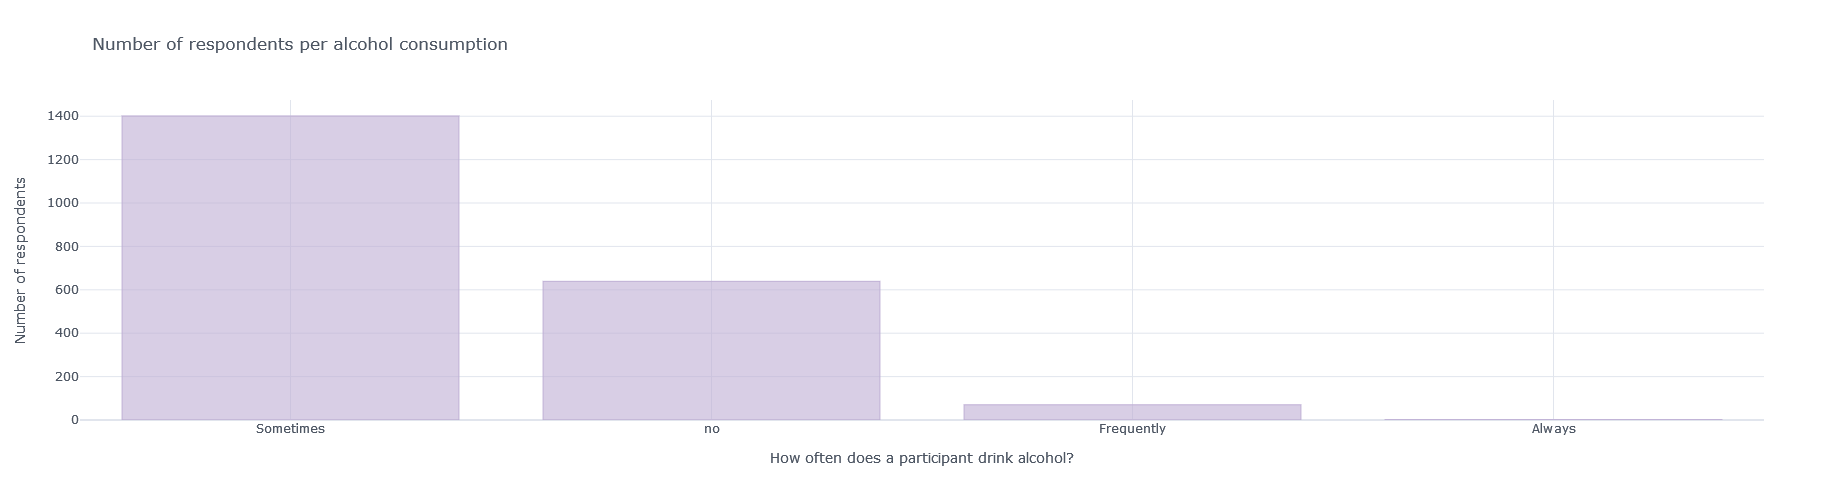

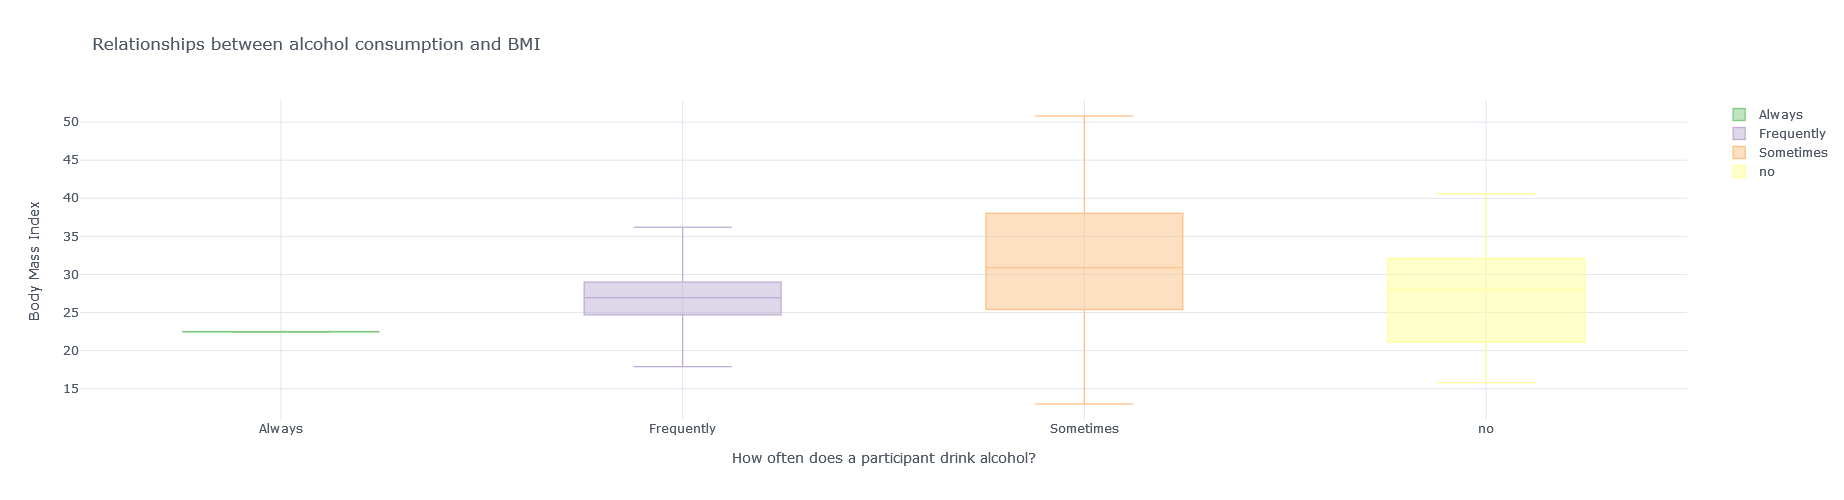

In [38]:
respondents_per_alcohol = data['Consumption_of_alcohol'].value_counts()
respondents_per_alcohol.iplot(kind = 'bar', dimensions = (800,500), 
                              xTitle = 'How often does a participant drink alcohol?', yTitle = 'Number of respondents', 
                              title = 'Number of respondents per alcohol consumption', color = '#BEAED4')

data[['Consumption_of_alcohol', 'BMI']].pivot(columns = 'Consumption_of_alcohol', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                                    xTitle = 'How often does a participant drink alcohol?', yTitle = 'Body Mass Index', 
                                                                                                    title = 'Relationships between alcohol consumption and BMI', colorscale = 'Accent')

Finally, consider the factors that determine physical activity:

- Physical activity frequency per week;
- Time using technological devices such as cell phone, videogames, television, computer and others;
- Transportation mode.

The majority of the respondents (70.8%) have low physical activity level. People might be not active enough for various reasons, including lack of time, money, health problems, sloth, self-consciousness, fatigue and so on. While the World Health Organization, the U.S. Department of Health and Human Services, and other authorities recommend that for good health, adults should get the equivalent of two and a half hours of moderate-to-vigorous physical activity each week. Physical activity increases people’s total energy expenditure, which can help them stay in energy balance or even lose weight, as long as they don’t eat more to compensate for the extra calories they burn[6]. Again, coming back to our data, we can see a negative trend in a person’s frequency of physical activity and their BMI.


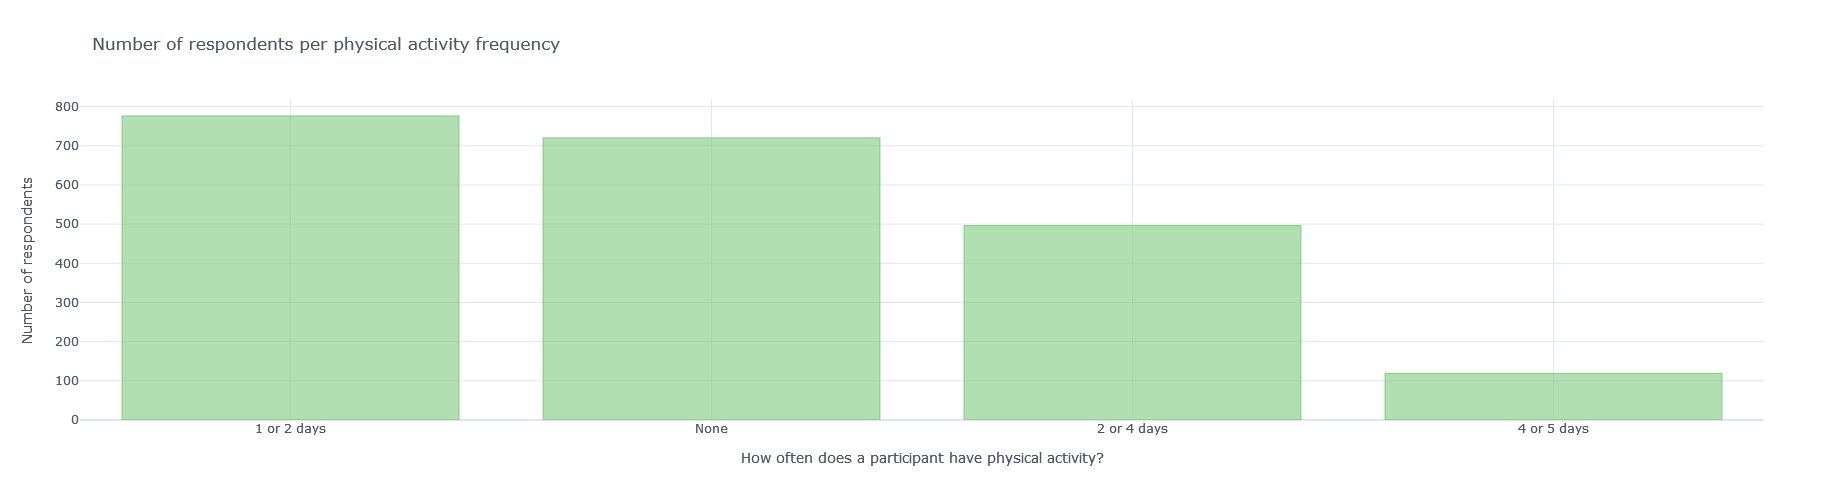

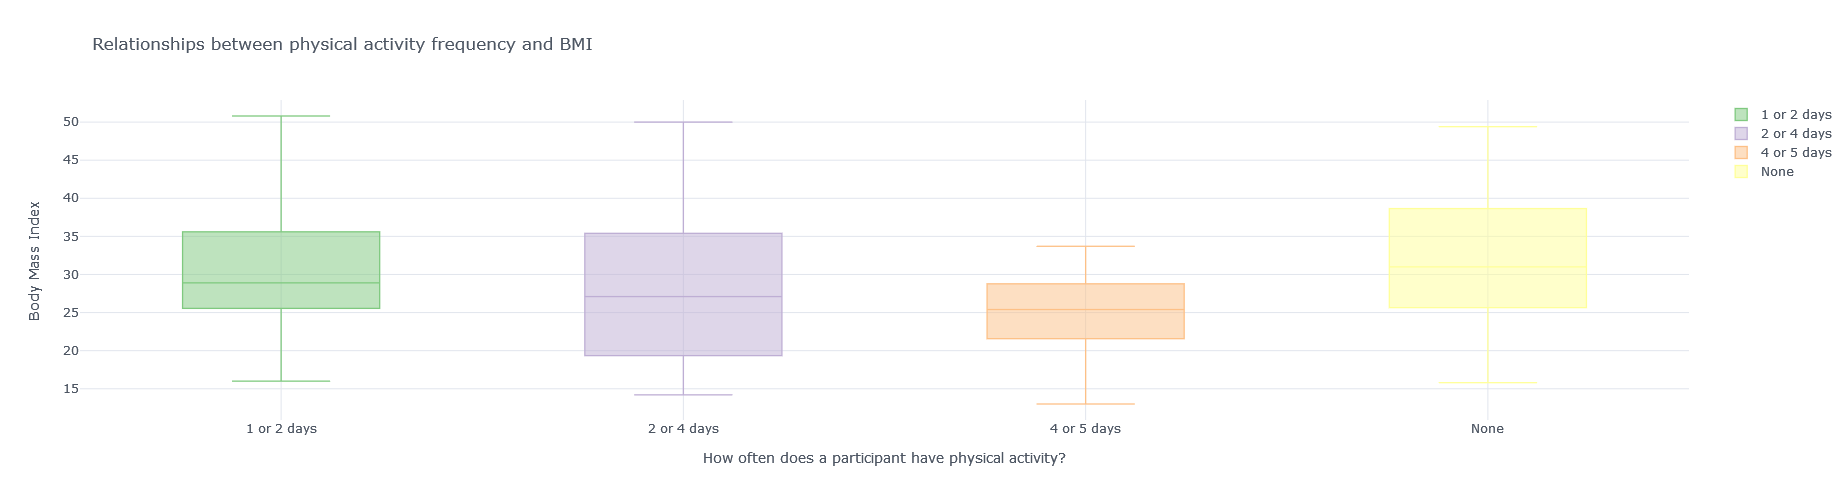

In [39]:
respondents_per_activity = data['Physical_activity_frequency'].value_counts()
respondents_per_activity.iplot(kind = 'bar', dimensions = (800,500),  
                               xTitle = 'How often does a participant have physical activity?', yTitle = 'Number of respondents', 
                               title = 'Number of respondents per physical activity frequency', color = '#7FC97F')

data[['Physical_activity_frequency', 'BMI']].pivot(columns = 'Physical_activity_frequency', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                              xTitle = 'How often does a participant have physical activity?', 
                                                                                              yTitle = 'Body Mass Index', 
                                                                                              title = 'Relationships between physical activity frequency and BMI', 
                                                                                              colorscale = 'Accent')

Obviously, using technological devices is not the evil in and of itself, but spending a lot of time in front of screens is a marker of an overall inactive lifestyle. 45% of respondents use multimedia devices less than 2 hours, 43% - between 3 and 5 hours, 12% - more than 5 hours. Relationships between time using technology devices and Body Mass Index are ambiguous: respondents who use devices less than two hours and those using between three and five hours have the same median BMI, whereas heavy gadget addiсts (more than five hours) have much lower BMI. 

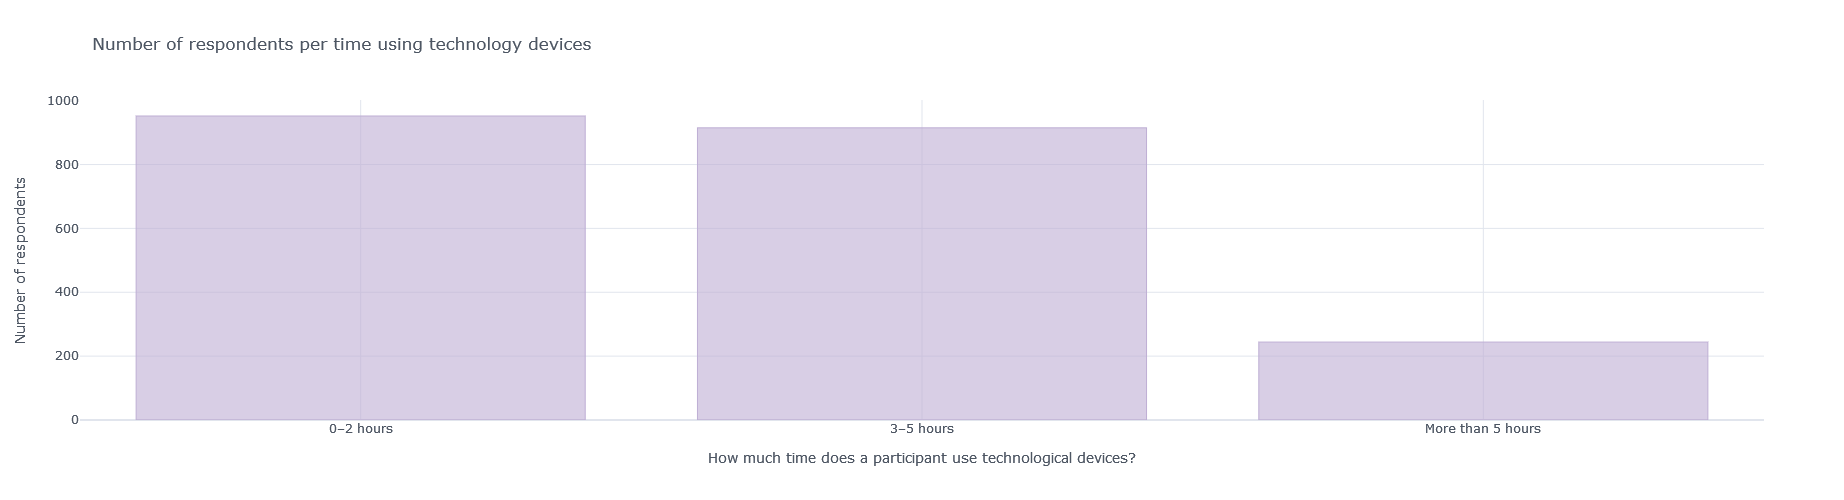

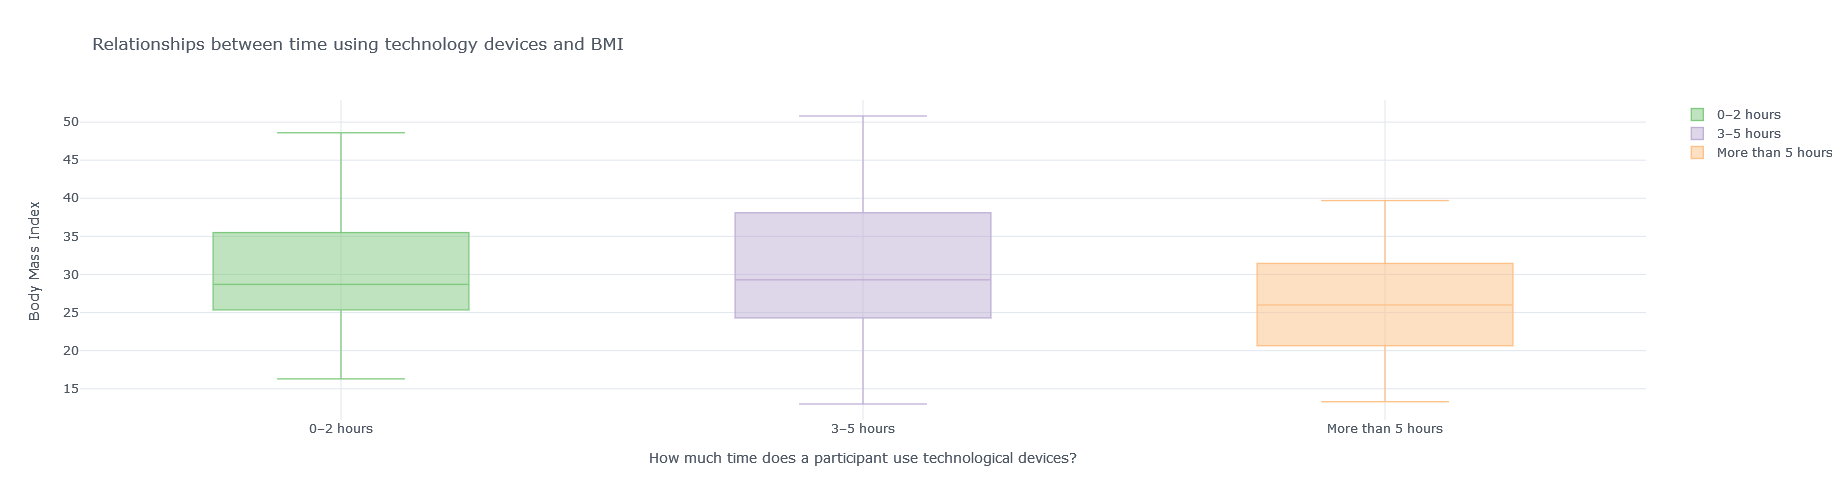

In [40]:
respondents_per_devices = data['Time_using_technology_devices'].value_counts()
respondents_per_devices.iplot(kind = 'bar', dimensions = (800,500), 
                              xTitle = 'How much time does a participant use technological devices?', yTitle = 'Number of respondents', 
                              title = 'Number of respondents per time using technology devices', color = '#BEAED4')

data[['Time_using_technology_devices', 'BMI']].pivot(columns = 'Time_using_technology_devices', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                              xTitle = 'How much time does a participant use technological devices?', 
                                                                                              yTitle = 'Body Mass Index', 
                                                                                              title = 'Relationships between time using technology devices and BMI', 
                                                                                              colorscale = 'Accent')

1580 participants (74.8%) prefer public transport, while the bike is preffered by 7 people only.  More vigorous ways of moving, such as walking or biking, is associated with well lower Body Mass Index. However, based on the quartiles, BMI of respondents who prefer public transport is more spread out, this may be attributed to bigger pull of observations in the category.


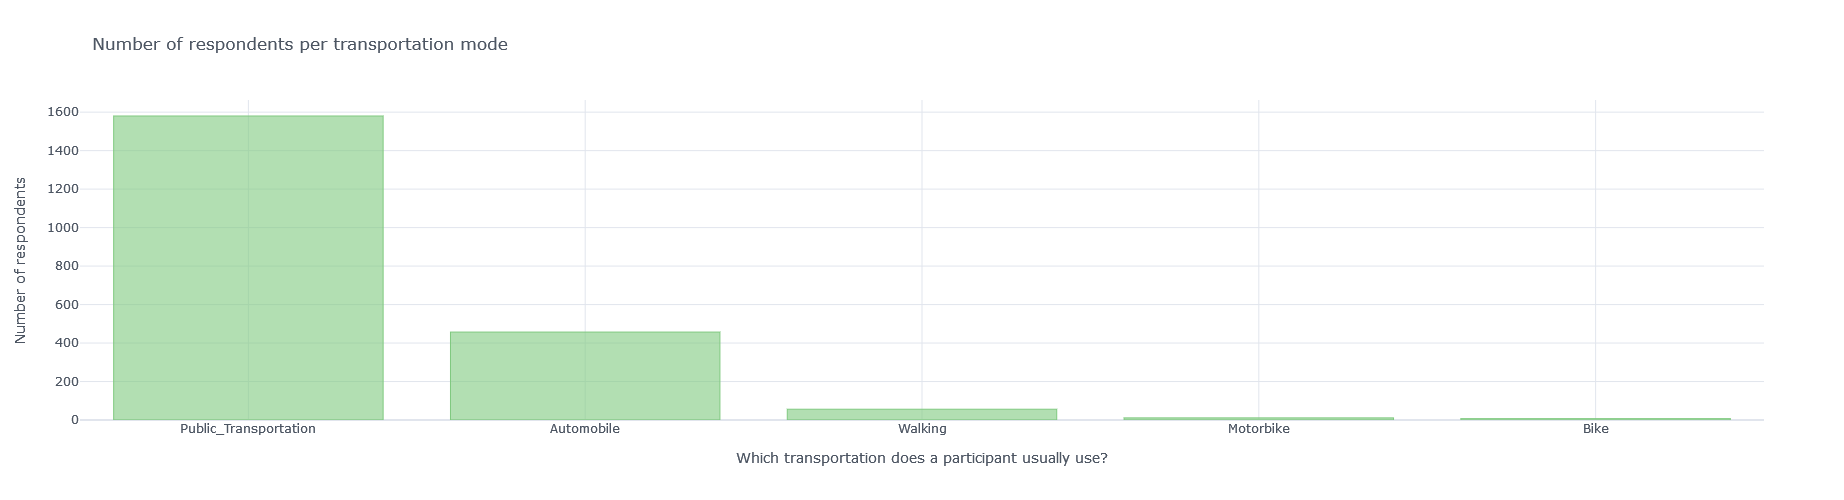

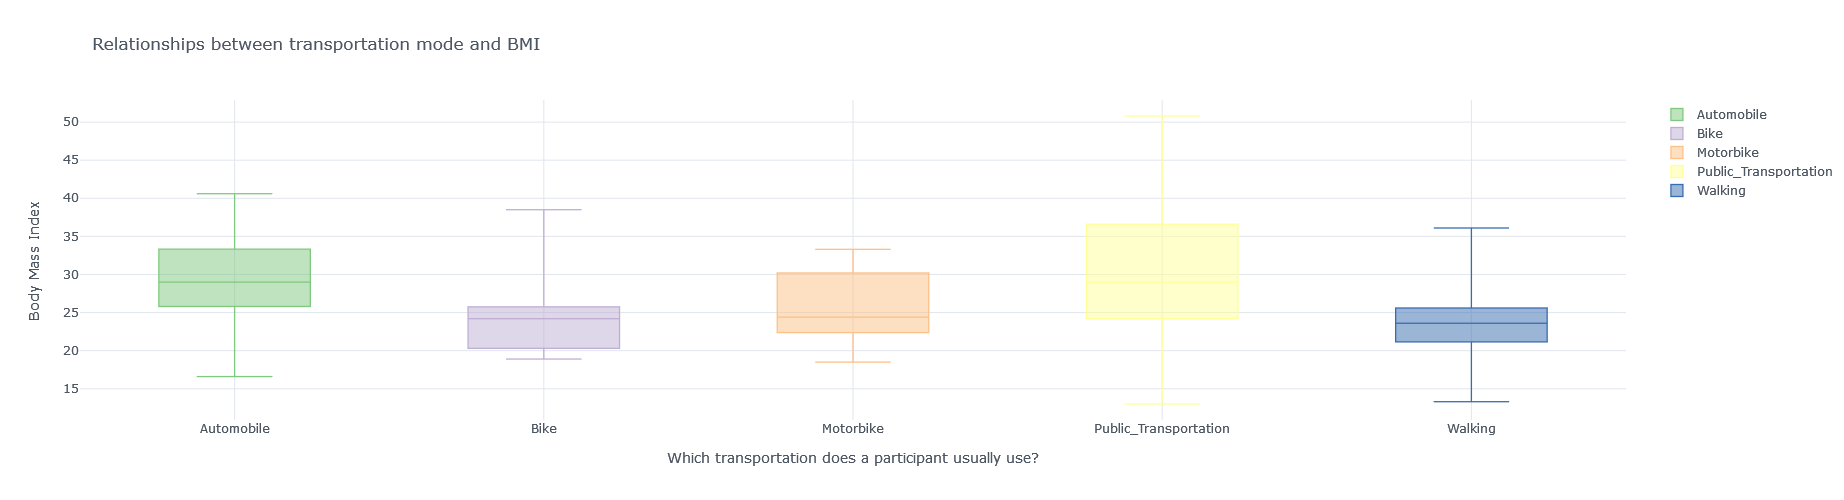

In [41]:
respondents_per_transportation = data['Transportation_used'].value_counts()
respondents_per_transportation.iplot(kind = 'bar', dimensions = (800,500), 
                                     xTitle = 'Which transportation does a participant usually use?', yTitle = 'Number of respondents', 
                                     title = 'Number of respondents per transportation mode', color = '#7FC97F')

data[['Transportation_used', 'BMI']].pivot(columns = 'Transportation_used', values = 'BMI').iplot(kind = 'box', dimensions = (800,500), 
                                                                                              xTitle = 'Which transportation does a participant usually use?', 
                                                                                              yTitle = 'Body Mass Index', 
                                                                                              title = 'Relationships between transportation mode and BMI', 
                                                                                              colorscale = 'Accent')

Thus, we found out that respondents, who have a family member suffered or suffers from overweight and eat high-calorie food frequently, are more likely to have a higher Body Mass Index. At the same time, counting the calories, high frequency of physical activity and choosing more vigorous ways of moving, such as walking or biking, is associated with well lower Body Mass Index. However, are our finding significant?

We check it through the Kruskal-Wallis H-test (a non-parametric version of analysis of variance with the null hypothesis that the population median of all of the groups are equal)[8]. In case if we see significant  differences (p < 0.05) in this test, pairwise comparisons of  the  groups  with  significant  differences  will be  identified  using  the  post-hoc  Conover  multiple  comparison  test.  

In [65]:
kruskal(data, dv = 'BMI', between = 'Family_history_with_overweight')

,Source,ddof1,H,p-unc
Kruskal,Calories_consumption_monitoring,1,85.625943,2.174044e-20


In [67]:
sp.posthoc_conover(data, val_col = 'BMI', group_col = 'Family_history_with_overweight', p_adjust = 'holm')

,no,yes
no,1.000000e+00,7.745915e-133
yes,7.745915e-133,1.000000e+00


In [66]:
kruskal(data, dv = 'BMI', between = 'Consumption_of_high_caloric_food')

,Source,ddof1,H,p-unc
Kruskal,Consumption_of_high_caloric_food,1,131.130455,2.318573e-30


In [68]:
sp.posthoc_conover(data, val_col = 'BMI', group_col = 'Consumption_of_high_caloric_food', p_adjust = 'holm')

,no,yes
no,1.000000e+00,2.858511e-31
yes,2.858511e-31,1.000000e+00


In [69]:
kruskal(data, dv = 'BMI', between = 'Calories_consumption_monitoring')

,Source,ddof1,H,p-unc
Kruskal,Calories_consumption_monitoring,1,85.625943,2.174044e-20


In [70]:
sp.posthoc_conover(data, val_col = 'BMI', group_col = 'Calories_consumption_monitoring', p_adjust = 'holm')

,no,yes
no,1.000000e+00,9.093153e-21
yes,9.093153e-21,1.000000e+00


In [71]:
kruskal(data, dv = 'BMI', between = 'Physical_activity_frequency')

,Source,ddof1,H,p-unc
Kruskal,Physical_activity_frequency,3,77.126107,1.268659e-16


In [72]:
sp.posthoc_conover(data, val_col = 'BMI', group_col = 'Physical_activity_frequency', p_adjust = 'holm')

,1 or 2 days,2 or 4 days,4 or 5 days,None
1 or 2 days,1.000000e+00,7.229160e-04,1.039430e-09,6.006398e-03
2 or 4 days,7.229160e-04,1.000000e+00,1.047203e-04,1.191222e-08
4 or 5 days,1.039430e-09,1.047203e-04,1.000000e+00,6.160384e-14
None,6.006398e-03,1.191222e-08,6.160384e-14,1.000000e+00


In [73]:
kruskal(data, dv = 'BMI', between = 'Transportation_used')

,Source,ddof1,H,p-unc
Kruskal,Transportation_used,4,46.468151,1.967867e-09


In [74]:
sp.posthoc_conover(data, val_col = 'BMI', group_col = 'Transportation_used', p_adjust = 'holm')

,Automobile,Bike,Motorbike,Public_Transportation,Walking
Automobile,1.000000e+00,0.613653,0.613653,9.090274e-01,1.187199e-07
Bike,6.136535e-01,1.000000,1.000000,5.244720e-01,1.000000e+00
Motorbike,6.136535e-01,1.000000,1.000000,5.244720e-01,1.000000e+00
Public_Transportation,9.090274e-01,0.524472,0.524472,1.000000e+00,1.755984e-09
Walking,1.187199e-07,1.000000,1.000000,1.755984e-09,1.000000e+00


In this way, we may reject the null hypothesis for all links based on extremely small p-values. Nevertheless, post-hoc test for transportation mode variable went fraud. 

<h2>Summary</h2>

Obesity is a global health problem strongly associated with many chronic illnesses with negative effects and long-term consequences, not only for the patients but also their families. There is no single or simple solution to the obesity epidemic, because body weight is not determined by a single factor, but influenced by a number of factors ranging from genetics to broader environmental, economic and social factors. During our analysis, we identified statistically significant relationship between Body Mass index and:
- family history of overweight;
- frequent high caloric food consumption;
- daily calories monitoring;
- frequency of physical activity.

Most of this factors are beyond our personal control, so overweight and obesity can be prevented. 

<h2>References</h2>

1. Big Mac® Combo Meal | McDonald’s. [online] Available at: <https://www.mcdonalds.com/us/en-us/meal/big-mac-meal.html> [Accessed 3 October 2021].
2. Launch of the Study: “The Heavy Burden of Obesity: The Economics of Prevention” - OECD. [online] Available at: <https://www.oecd.org/about/secretary-general/heavy-burden-of-obesity-mexico-january-2020.htm> [Accessed 1 October 2021].
3. National Research Council (US) Subcommittee on the Tenth Edition of the Recommended Dietary Allowances. Recommended Dietary Allowances: 10th Edition. Washington (DC): National Academies Press (US); 1989. 3, Energy. Available at: <https://www.ncbi.nlm.nih.gov/books/NBK234938/> [Accessed 3 October 2021].
4. Obesity - The Link between Your Weight and Your Family - Obesity Action Coalition. [online] Available at: <https://www.obesityaction.org/community/article-library/obesity-the-link-between-your-weight-and-your-family/> [Accessed 3 October 2021].
5. Obesity and overweight. [online] Available at: <https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight> [Accessed 2 October 2021].
6. Obesity Prevention Source. Physical Activity. [online] Available at: <https://www.hsph.harvard.edu/obesity-prevention-source/obesity-causes/physical-activity-and-obesity/> [Accessed 3 October 2021].
7. Palechor, F. and Manotas, A., 2019. Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 25, p.104344.
8. Pingouin.kruskal — pingouin 0.4.0 documentation. [online] Available at: <https://pingouin-stats.org/generated/pingouin.kruskal.html#pingouin.kruskal> [Accessed 4 October 2021].
9. Ritchie, H. and Roser, M., 2021. Obesity. [online] Our World in Data. Available at: <https://ourworldindata.org/obesity> [Accessed 1 October 2021].
10. Summer, E., 2021. 40% of Peruvians are overweight and obese. [online] PeruTelegraph. Available at: <https://www.perutelegraph.com/news/peruvian-curiosities/40-of-peruvians-are-overweight-and-obese> [Accessed 2 October 2021].
11. UCI Machine Learning Repository: Estimation of obesity levels based on eating habits and physical condition Data Set. [online] Available at: <https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+> [Accessed 1 October 2021].
12. Upgrading the UCI ML Repository | Center for Machine Learning and Intelligent Systems. [online] Available at: <https://cml.ics.uci.edu/2020/01/upgrading-the-uci-ml-repository/> [Accessed 1 October 2021].
13. World Map - Underweight - BMI > Data Visualisations > NCD-RisC. [online] Available at: <https://ncdrisc.org/underweight-prevalence-map.html> [Accessed 3 October 2021].